In [1]:
import pandas as pd

In [2]:
leases = pd.read_csv('C:\\SMU\\DataFest\\selected\\Leases.csv')
mmod = pd.read_csv('C:\\SMU\\DataFest\\selected\\Major_Market_Occupancy_Data.csv')

## unemployment for NY

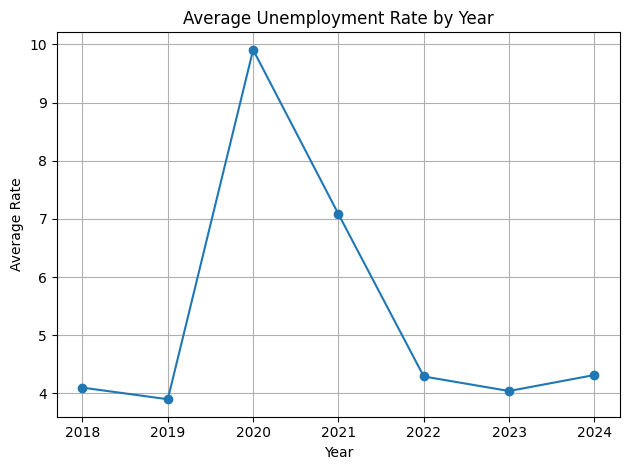

In [3]:
# import unemployment data for New York, state wide, seasonally adjusted
data = {'Year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Jan': [4.5, 4.0, 4.1, 8.6, 5.2, 4.0, 4.2],
    'Feb': [4.4, 3.9, 4.2, 8.4, 4.8, 4.0, 4.1],
    'Mar': [4.3, 3.9, 4.2, 8.1, 4.6, 4.0, 4.2],
    'Apr': [4.2, 3.8, 15.7, 7.9, 4.5, 3.9, 4.2],
    'May': [4.1, 3.8, 16.7, 7.5, 4.3, 3.9, 4.3],
    'Jun': [4.0, 3.8, 13.6, 7.5, 4.2, 3.9, 4.4],
    'Jul': [3.9, 3.8, 12.6, 7.1, 4.0, 4.0, 4.4],
    'Aug': [3.9, 3.9, 10.8, 6.8, 3.8, 4.1, 4.4],
    'Sep': [3.9, 3.9, 10.2, 6.2, 3.9, 4.1, 4.4],
    'Oct': [4.0, 4.0, 9.2, 5.9, 4.0, 4.2, 4.4],
    'Nov': [4.0, 4.0, 8.9, 5.6, 4.1, 4.2, 4.4],
    'Dec': [4.0, 4.0, 8.7, 5.4, 4.1, 4.2, 4.4]}

df = pd.DataFrame(data)
long_df = df.melt(id_vars='Year', var_name='Month', value_name='Rate')
import matplotlib.pyplot as plt

long_df.groupby('Year')['Rate'].mean().plot(kind='line', marker='o')
plt.title('Average Unemployment Rate by Year')
plt.ylabel('Average Rate')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


## go-stay proportion > 0.5 growing 
growing (occupany proportions, go-stay , percent change per quarter of leases, unemployment rate, GDP?)
anova output occupany rate 
chi square growing or not per industry

1. create a function that combines go or stay proportion, with other variables to make a growth rate for particular market
2. A client will come to us and say they want to enter this specific market
3. So we use this function and create a time series model that will predict the growth rate of this market for the next year 
4. This is specific to an industry 


### create function

In [4]:
df = pd.read_csv("C:/SMU/DataFest/growth_index_data.csv")
df.head()

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent
0,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,A,0.591837,34.187179,0.041473,27.655891
1,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,O,0.591837,0.000000,0.041473,18.560886
2,Atlanta,Q1,2018,Fulton County,Legal Services,A,0.466667,0.000000,0.041473,27.655891
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886


### create data to use (can skip if have data file)

In [5]:
# calculate percent change per quarter of leases
print(df.shape)
df = leases[leases['internal_industry'].isin(['Legal Services', 'Financial Services and Insurance', 'Technology, Advertising, Media, and Information'])]


# Sort by market, then by year, then by quarter (or date, if applicable)
df = df.sort_values(by=['year', 'quarter'])

# Group by market and calculate the percent change of 'leases' for each market
df['quarter_percent_change_lease'] = df.groupby('market')['leasing'].pct_change() * 100

# Impute NaN values in the 'quarter_percent_change_lease' column with 0
# Impute NaN values in the 'quarter_percent_change_lease' column with 0
df['quarter_percent_change_lease'] = df['quarter_percent_change_lease'].fillna(0)
print(df.shape)


(2190, 10)
(10197, 36)


C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\3988507892.py:10: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['quarter_percent_change_lease'] = df.groupby('market')['leasing'].pct_change() * 100


In [6]:
# calculate go_stay proportion by market

df['go_stay'] = df['transaction_type'].apply(lambda x: 'go' if x in ['New', 'Relocation'] else 'stay')
df['go_stay'].value_counts()

df['go_proportion'] = df.groupby(['market', 'internal_industry', 'quarter'])['go_stay'].transform(lambda x: (x == "go").mean())
df.head(3)
#print(df.shape)

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,quarter_percent_change_lease,go_stay,go_proportion
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,stay,0.591837
9,2018,Q1,1.0,Atlanta,271 17th,Atlanta_Midtown_Atlanta_271 17th_271 17th St NW,271 17th St NW,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,go,0.789474
14,2018,Q1,1.0,Atlanta,Bank of America Plaza,Atlanta_Downtown_Atlanta_Bank of America Plaza...,600 Peachtree St NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.0,go,0.789474


In [7]:
# add remote work adoption
remote_work = pd.read_csv("C:/SMU/DataFest/remote_work_by_country.csv")
remote_work.head(5)

,county_name,worked_at_home_rate,employed_pop,commuters_by_public_transportation_rate,total_pop
0,Baltimore City,0.037467,277954.000000,0.178950,619796.0
1,Cook County,0.052146,843658.333333,0.066269,1753667.0
2,Davidson County,0.041019,218648.000000,0.012392,421220.0
3,Essex County,0.049471,159002.800000,0.054382,326356.0
4,Fairfax city,0.070126,12834.000000,0.099501,23580.0


In [8]:
df_focused = df[df['market'].isin(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago Suburbs', 'Detroit', 'Houston', 'Los Angeles', 'Manhattan', 
                                    'Nashville','Northern New Jersey', 'Northern Virginia', 'Philadelphia', 'Phoenix', 'Salt Lake City', 'San Diego', 'San Francisco',
                                    'Seattle', 'South Florida', 'Tampa'])]

In [9]:
county_dict = {
    'Atlanta': 'Fulton County',
    'Austin': 'Travis County',
    'Baltimore': 'Baltimore City',
    'Boston': 'Suffolk County',
    'Charlotte': 'Mecklenburg County',
    'Chicago Suburbs': 'Cook County',
    'Detroit': 'Wayne County',
    'Houston': 'Harris County',
    'Los Angeles': 'Los Angeles County',
    'Manhattan': 'New York County',
    'Nashville': 'Davidson County',
    'Northern New Jersey': 'Essex County',
    'Northern Virginia': 'Fairfax city',
    'Philadelphia': 'Philadelphia County',
    'Phoenix': 'Maricopa County',
    'Salt Lake City': 'Salt Lake County',
    'San Diego': 'San Diego County',
    'San Francisco': 'San Francisco County',
    'Seattle': 'King County',
    'South Florida': 'Miami-Dade County',
    'Tampa': 'Hillsborough County'
}


In [10]:
len(df_focused['market'].unique())

21

In [11]:
df_very_focused = df_focused[['market', 'quarter', 'year', 'go_proportion', 'quarter_percent_change_lease', 'internal_industry', 'internal_class','internal_class_rent']]
df_very_focused = df_very_focused.drop_duplicates()
df_very_focused.head(10)
print(df_very_focused.shape)

(3342, 8)


In [12]:
df_very_focused['county_name'] = df_very_focused['market'].map(county_dict)
print(df_very_focused.shape)
# Merge remote_work and df_very_focused on 'county_name'
df_final = pd.merge(df_very_focused, remote_work, on='county_name', how='left')

# Save the final dataframe to a CSV file
df_final.to_csv('df_final.csv', index=False)

df_final.tail(5)
print(df_final.shape)

(3342, 9)
(3342, 13)


In [13]:
df_very_focused.head(10)

,market,quarter,year,go_proportion,quarter_percent_change_lease,internal_industry,internal_class,internal_class_rent,county_name
0,Atlanta,Q1,2018,0.591837,0.000000,Financial Services and Insurance,A,27.655891,Fulton County
9,Atlanta,Q1,2018,0.789474,0.000000,"Technology, Advertising, Media, and Information",A,27.655891,Fulton County
106,Austin,Q1,2018,0.625000,0.000000,Legal Services,O,30.118658,Travis County
135,Austin,Q1,2018,0.833333,836.536618,Financial Services and Insurance,A,40.384706,Travis County
138,Austin,Q1,2018,0.833333,0.000000,Financial Services and Insurance,A,40.384706,Travis County
309,Boston,Q1,2018,0.576923,0.000000,"Technology, Advertising, Media, and Information",O,20.147725,Suffolk County
380,Charlotte,Q1,2018,0.600000,0.000000,Legal Services,O,20.755558,Mecklenburg County
384,Charlotte,Q1,2018,0.903226,555.557682,Financial Services and Insurance,A,28.589370,Mecklenburg County
387,Charlotte,Q1,2018,0.800000,0.000000,"Technology, Advertising, Media, and Information",A,28.589370,Mecklenburg County
388,Charlotte,Q1,2018,0.903226,0.000000,Financial Services and Insurance,A,28.589370,Mecklenburg County


In [14]:
df_final[['market', 'county_name', 'worked_at_home_rate', 'quarter', 'year', 'go_proportion', 'quarter_percent_change_lease']].head(5)

,market,county_name,worked_at_home_rate,quarter,year,go_proportion,quarter_percent_change_lease
0,Atlanta,Fulton County,0.041473,Q1,2018,0.591837,0.000000
1,Atlanta,Fulton County,0.041473,Q1,2018,0.789474,0.000000
2,Austin,Travis County,0.082316,Q1,2018,0.625000,0.000000
3,Austin,Travis County,0.082316,Q1,2018,0.833333,836.536618
4,Austin,Travis County,0.082316,Q1,2018,0.833333,0.000000


In [15]:
df_srsly_final = df_final.groupby(['market', 'quarter', 'year', 'county_name', 'internal_industry', 'internal_class'], as_index=False).agg({
    'go_proportion': 'mean',
    'quarter_percent_change_lease': 'mean',
    'worked_at_home_rate': 'mean',
    # 'internal_class': 'first',
    'internal_class_rent': 'mean'

})

# Check the result
df_srsly_final.head(10)
print(df_srsly_final.shape)

(2190, 10)


In [16]:
# Save df_srsly_final to a CSV file
df_srsly_final.to_csv("C:/SMU/DataFest/growth_index_data.csv", index=False)

In [17]:
df_srsly_final.head(5)

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent
0,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,A,0.591837,34.187179,0.041473,27.655891
1,Atlanta,Q1,2018,Fulton County,Financial Services and Insurance,O,0.591837,0.000000,0.041473,18.560886
2,Atlanta,Q1,2018,Fulton County,Legal Services,A,0.466667,0.000000,0.041473,27.655891
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886


### actual calculations

In [20]:

df = df_srsly_final.copy()
df_srsly_final['normalized_go_proportion'] = df.groupby('internal_industry')['go_proportion'].transform(lambda x: (x - x.mean()) / x.std())
df_srsly_final['normalized_percent_change_leases'] = df.groupby('internal_industry')['quarter_percent_change_lease'].transform(lambda x: (x - x.mean()) / x.std())
df_srsly_final['normalized_remote_work'] = df.groupby('internal_industry')['worked_at_home_rate'].transform(lambda x: (x - x.mean()) / x.std())

df_tech = df_srsly_final[df_srsly_final['internal_industry'] == 'Technology, Advertising, Media, and Information'].copy()
df_legal = df_srsly_final[df_srsly_final['internal_industry'] == 'Legal Services'].copy()
df_finance = df_srsly_final[df_srsly_final['internal_industry'] == 'Financial Services and Insurance'].copy()

w1, w2, w3 = 0.5, 0.3, 0.2

# Now calculate the growth index for each industry
df_tech['growth_index'] = (w1 * df_tech['normalized_go_proportion'] +
                           w2 * df_tech['normalized_percent_change_leases'] -
                           w3 * df_tech['normalized_remote_work'])

df_legal['growth_index'] = (w1 * df_legal['normalized_go_proportion'] +
                            w2 * df_legal['normalized_percent_change_leases'] -
                            w3 * df_legal['normalized_remote_work'])

df_finance['growth_index'] = (w1 * df_finance['normalized_go_proportion'] +
                              w2 * df_finance['normalized_percent_change_leases'] -
                              w3 * df_finance['normalized_remote_work'])


In [34]:
# Min-Max scaling to range [-1, 1]
df_tech['growth_index_normalized'] = 2 * ((df_tech['growth_index'] - df_tech['growth_index'].min()) /
                                                 (df_tech['growth_index'].max() - df_tech['growth_index'].min())) - 1

# Min-Max scaling to range [-1, 1]
df_legal['growth_index_normalized'] = 2 * ((df_legal['growth_index'] - df_legal['growth_index'].min()) /
                                                 (df_legal['growth_index'].max() - df_legal['growth_index'].min())) - 1

# Min-Max scaling to range [-1, 1]
df_finance['growth_index_normalized'] = 2 * ((df_finance['growth_index'] - df_finance['growth_index'].min()) /
                                                 (df_finance['growth_index'].max() - df_finance['growth_index'].min())) - 1

In [35]:
# Rescale from [-1, 0] to [-1, 1]
df_tech['growth_index_rescaled'] = 2 * (df_tech['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1
df_legal['growth_index_rescaled'] = 2 * (df_legal['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1
df_finance['growth_index_rescaled'] = 2 * (df_finance['growth_index_normalized'] - (-1)) / (0 - (-1)) - 1


In [23]:
df_tech.to_csv('C:/SMU/DataFest/df_tech.csv', index=False)
df_legal.to_csv('C:/SMU/DataFest/df_legal.csv', index=False)
df_finance.to_csv('C:/SMU/DataFest/df_finance.csv', index=False)

In [24]:
#df_legal.head()
df_legal.rename(columns={'growth_index_rescaled': 'legal_growth_index'}, inplace=True)
df_legal_growth = df_legal[['market', 'quarter', 'year', 'legal_growth_index', 'internal_class', 'internal_class_rent']]


In [25]:
df_tech.rename(columns={'growth_index_rescaled': 'tech_growth_index'}, inplace=True)
df_tech_growth = df_tech[['market', 'quarter', 'year', 'tech_growth_index', 'internal_class', 'internal_class_rent']]
df_finance.rename(columns={'growth_index_rescaled': 'finance_growth_index'}, inplace=True)
df_finance_growth = df_finance[['market', 'quarter', 'year', 'finance_growth_index', 'internal_class', 'internal_class_rent']]

In [26]:
import pandas as pd
df_merged = pd.merge(df_legal_growth, df_tech_growth, on=['market', 'quarter', 'year', 'internal_class', 'internal_class_rent'], how='outer')
df_merged = pd.merge(df_merged, df_finance_growth, on=['market', 'quarter', 'year', 'internal_class', 'internal_class_rent'], how='outer')


In [ ]:
df_merged.to_csv('C:/SMU/DataFest/growth_merged.csv', index=False)

In [37]:
df_tech.head(5)

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent,normalized_go_proportion,normalized_percent_change_leases,normalized_remote_work,growth_index,growth_index_normalized,tech_growth_index,growth_index_rescaled
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891,0.871503,0.400902,-0.916915,0.739405,-0.018539,0.962922,0.962922
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886,0.871503,-0.435005,-0.916915,0.488633,-0.107226,0.785548,0.785548
8,Atlanta,Q1,2019,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,80.175829,0.041473,30.044474,0.871503,1.106376,-0.916915,0.951047,0.056310,1.112619,1.112619
12,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,42.400032,0.041473,32.068992,0.871503,0.526889,-0.916915,0.777201,-0.005172,0.989656,0.989656
13,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-45.887464,0.041473,21.716556,0.871503,-0.827456,-0.916915,0.370898,-0.148864,0.702272,0.702272


C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\1358052353.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech_manhattan['industry'] = 'Tech'
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\1358052353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_legal_manhattan['industry'] = 'Legal'
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\1358052353.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

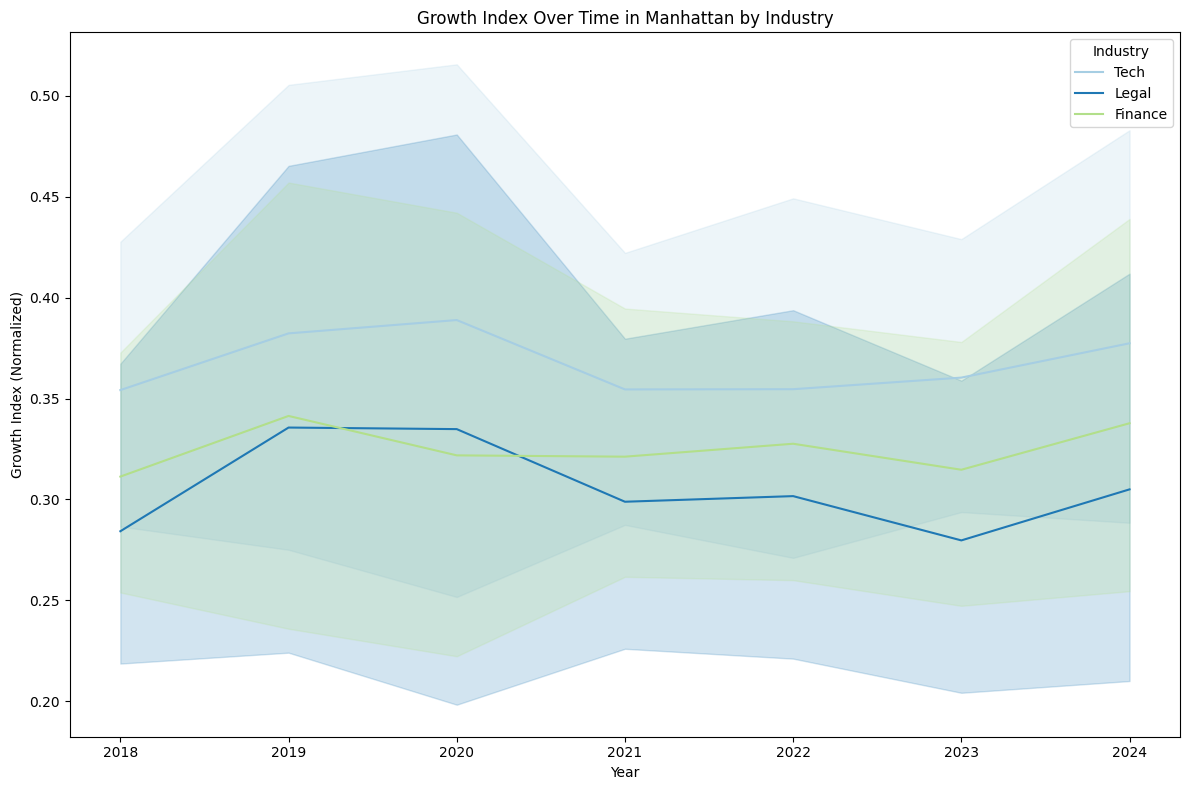

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette("Paired")

# Filter for just Manhattan in each dataset
df_tech_manhattan = df_tech[df_tech['market'] == 'Manhattan']
df_legal_manhattan = df_legal[df_legal['market'] == 'Manhattan']
df_finance_manhattan = df_finance[df_finance['market'] == 'Manhattan']

# Add an industry column to each
df_tech_manhattan['industry'] = 'Tech'
df_legal_manhattan['industry'] = 'Legal'
df_finance_manhattan['industry'] = 'Finance'

# Combine into one DataFrame
df_combined = pd.concat([df_tech_manhattan, df_legal_manhattan, df_finance_manhattan])

# Create a single plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_combined, x='year', y='growth_index_rescaled', hue='industry')

# Add labels and title
plt.title('Growth Index Over Time in Manhattan by Industry')
plt.xlabel('Year')
plt.ylabel('Growth Index (Normalized)')
plt.legend(title='Industry')
plt.tight_layout()
plt.show()


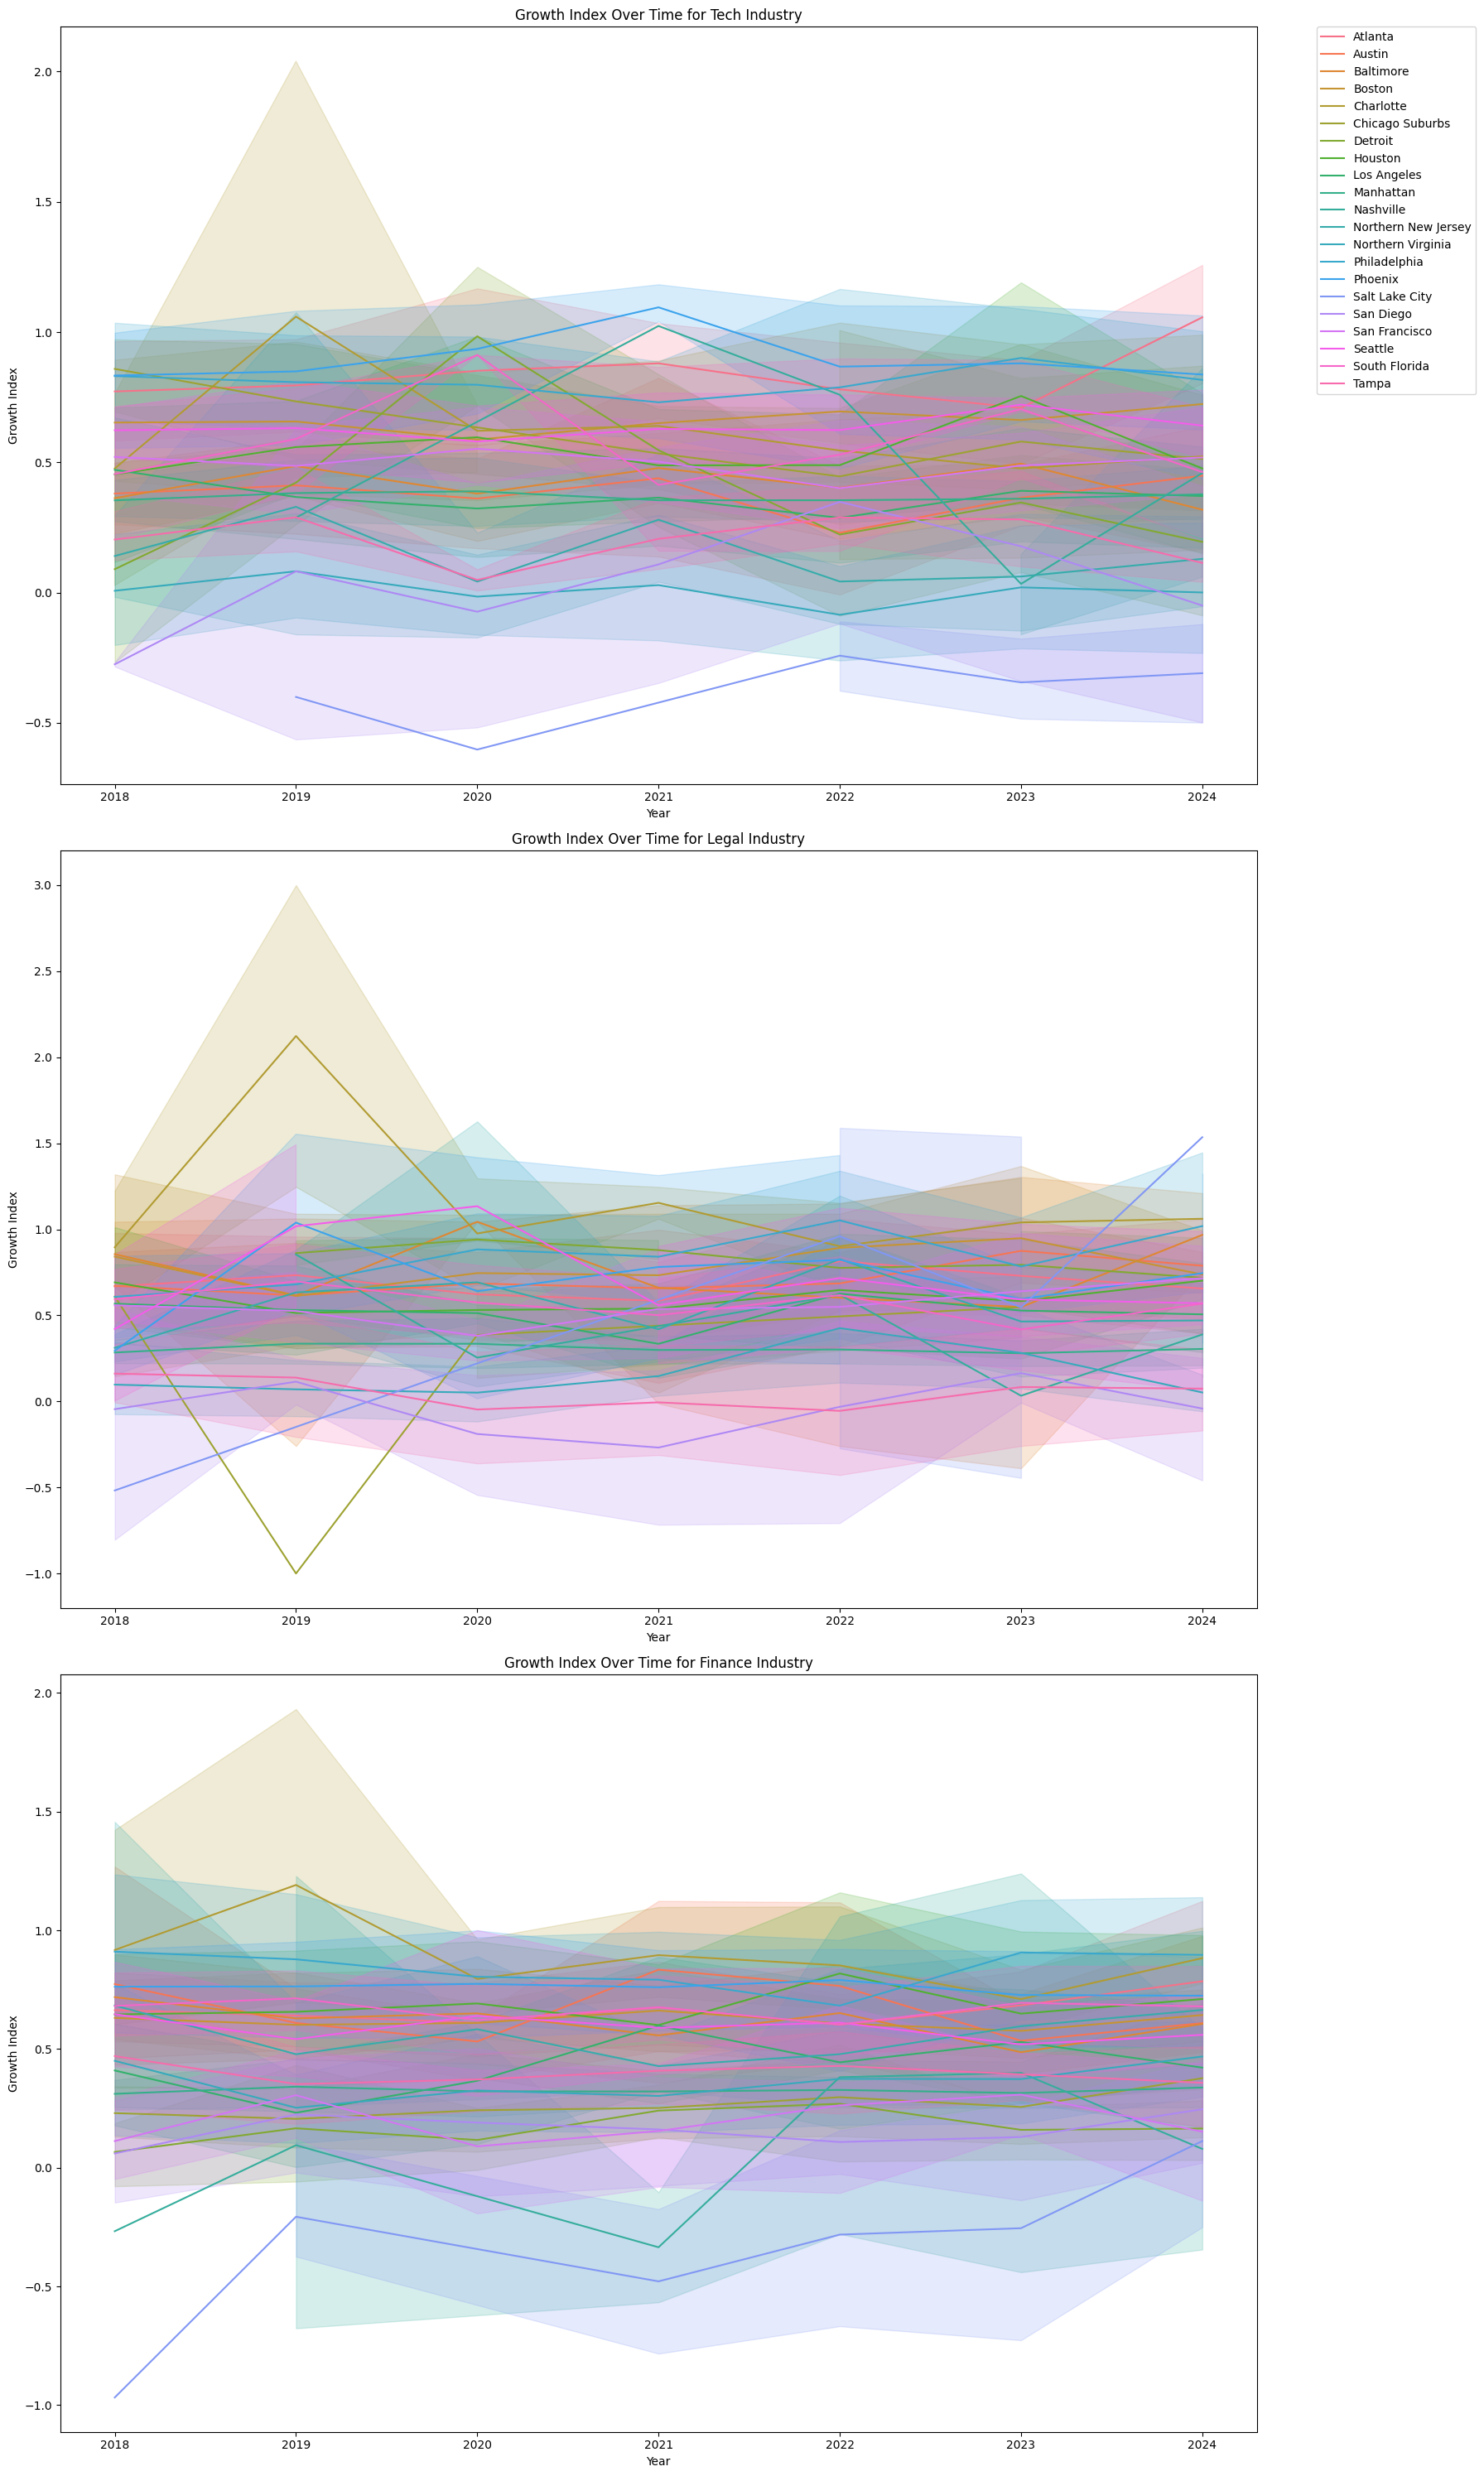

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Paired")

# Create a 3-row, 1-column grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 30))

# Set titles for the subplots
axes[0].set_title('Growth Index Over Time for Tech Industry')
axes[1].set_title('Growth Index Over Time for Legal Industry')
axes[2].set_title('Growth Index Over Time for Finance Industry')

# Plot for Technology Industry (df_tech)
sns.lineplot(data=df_tech, x='year', y='growth_index_rescaled', hue='market', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Growth Index')

# Plot for Legal Industry (df_legal)
sns.lineplot(data=df_legal, x='year', y='growth_index_rescaled', hue='market', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Growth Index')

# Plot for Financial Industry (df_finance)
sns.lineplot(data=df_finance, x='year', y='growth_index_rescaled', hue='market', ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Growth Index')

axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
axes[1].legend().remove()
axes[2].legend().remove()

# Improve layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## forecasting

internal_class_rent, growth_index_rescaled

### internal_class_rent

In [144]:
df_tech.head(5)

,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent,normalized_go_proportion,normalized_percent_change_leases,normalized_remote_work,growth_index,growth_index_normalized,growth_index_rescaled
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891,0.871503,0.400902,-0.916915,0.739405,-0.018539,0.962922
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886,0.871503,-0.435005,-0.916915,0.488633,-0.107226,0.785548
8,Atlanta,Q1,2019,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,80.175829,0.041473,30.044474,0.871503,1.106376,-0.916915,0.951047,0.056310,1.112619
12,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,42.400032,0.041473,32.068992,0.871503,0.526889,-0.916915,0.777201,-0.005172,0.989656
13,Atlanta,Q1,2020,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-45.887464,0.041473,21.716556,0.871503,-0.827456,-0.916915,0.370898,-0.148864,0.702272


##### SARIMA

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
df = df_tech.copy()

# --- Step 1: Convert year + quarter to a datetime index ---
def quarter_to_date(year, quarter):
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    start_month = quarter_start_month.get(quarter, 1)
    return pd.Timestamp(year=int(year), month=start_month, day=1)

df['date'] = df.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# --- Step 2: Forecasting per (market, internal_class) ---
forecast_data = []

# Define minimum sample size for ADF test
MIN_SAMPLE_SIZE = 10

for (market, internal_class), group_df in df.groupby(['market', 'internal_class']):
    print(f"\n🔍 Processing: Market = {market}, Internal Class = {internal_class}")
    
    # Only keep date and rent
    ts = group_df[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional, can forward fill)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # --- Check if the sample size is large enough ---
    if len(ts) < MIN_SAMPLE_SIZE:
        print(f"❌ Not enough data for {market}, {internal_class}. Skipping this group.")
        continue  # Skip this group if not enough data

    # --- ADF Test for Stationarity ---
    try:
        adf_result = adfuller(ts['internal_class_rent'].dropna())
        print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")
        if adf_result[1] > 0.05:
            print("❗ Non-stationary — differencing will be applied.")
        else:
            print("✅ Stationary — safe to proceed.")
    except Exception as e:
        print(f"❌ Error during ADF test for {market}, {internal_class}: {e}. Skipping this group.")
        continue  # Skip this group if ADF test fails

    # --- Fit SARIMA Model ---
    try:
        model = SARIMAX(ts['internal_class_rent'],
                        order=(1, 1, 1),  # ARIMA order
                        seasonal_order=(1, 1, 1, 4),  # Seasonal order
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=False)
        print(model_fit.summary())

        # --- Forecast the next 4 quarters ---
        steps = 4
        forecast = model_fit.get_forecast(steps=steps)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(),
                                     periods=steps, freq='QS')

        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast.predicted_mean.values,
            'lower_ci': forecast.conf_int().iloc[:, 0].values,
            'upper_ci': forecast.conf_int().iloc[:, 1].values,
            'market': market,
            'internal_class': internal_class
        })

        forecast_data.append(forecast_df)
    
    except Exception as e:
        print(f"❌ Error with SARIMA model for {market}, {internal_class}: {e}. Skipping this group.")
        continue  # Skip this group if SARIMA fitting fails

# --- Step 3: Combine All Forecasts ---
forecast_results_df = pd.concat(forecast_data, ignore_index=True)

# Optional: Save or inspect
forecast_results_df.to_csv('forecast_results.csv', index=False)
print("\n📈 Forecast Preview:")
print(forecast_results_df.head(10))





🔍 Processing: Market = Atlanta, Internal Class = A
ADF Statistic: -2.1437, p-value: 0.2273
❗ Non-stationary — differencing will be applied.
                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -9.567
Date:                           Sat, 12 Apr 2025   AIC                             29.134
Time:                                   22:24:06   BIC                             33.300
Sample:                               01-01-2018   HQIC                            29.548
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -12.354
Date:                           Sat, 12 Apr 2025   AIC                             34.709
Time:                                   22:24:06   BIC                             38.572
Sample:                               01-01-2018   HQIC                            34.907
                                    - 07-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3880      0.597      0.650      0.515      -0.781       1.557
ma.L1          0.1754      4.721      0.037

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   25
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -14.487
Date:                           Sat, 12 Apr 2025   AIC                             38.973
Time:                                   22:24:07   BIC                             42.169
Sample:                               10-01-2018   HQIC                            38.678
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0056      4.059      0.001      0.999      -7.950       7.961
ma.L1          0.0071      4.049      0.002

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -5.450
Date:                           Sat, 12 Apr 2025   AIC                             20.900
Time:                                   22:24:07   BIC                             25.066
Sample:                               01-01-2018   HQIC                            21.314
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4038      1.058      0.382      0.703      -1.670       2.478
ma.L1         -0.2442      1.255     -0.195

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -16.280
Date:                           Sat, 12 Apr 2025   AIC                             42.559
Time:                                   22:24:07   BIC                             46.100
Sample:                               07-01-2018   HQIC                            42.522
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2128      0.966     -0.220      0.826      -2.106       1.680
ma.L1         -0.0328      2.284     -0.014

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statesp

                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -13.266
Date:                           Sat, 12 Apr 2025   AIC                             36.532
Time:                                   22:24:08   BIC                             40.698
Sample:                               01-01-2018   HQIC                            36.946
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1970      6.917      0.028      0.977     -13.361      13.755
ma.L1         -0.1094      7.519     -0.015

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   23
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -28.450
Date:                           Sat, 12 Apr 2025   AIC                             66.901
Time:                                   22:24:08   BIC                             69.325
Sample:                               01-01-2019   HQIC                            66.003
                                    - 07-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1746      0.720     -0.243      0.808      -1.586       1.236
ma.L1         -1.0172     41.069     -0.025

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -24.664
Date:                           Sat, 12 Apr 2025   AIC                             59.328
Time:                                   22:24:09   BIC                             63.494
Sample:                               01-01-2018   HQIC                            59.742
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6199      0.273     -2.273      0.023      -1.155      -0.085
ma.L1          0.7820      2.232      0.350

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -31.130
Date:                           Sat, 12 Apr 2025   AIC                             72.260
Time:                                   22:24:09   BIC                             76.426
Sample:                               01-01-2018   HQIC                            72.674
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1962      2.526     -0.078      0.938      -5.147       4.754
ma.L1         -0.1906   1.33e-09  -1.44e+08

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -28.461
Date:                           Sat, 12 Apr 2025   AIC                             66.923
Time:                                   22:24:10   BIC                             70.786
Sample:                               01-01-2018   HQIC                            67.121
                                    - 07-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4969      0.496      1.001      0.317      -0.476       1.470
ma.L1         -0.5097      1.339     -0.381

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statesp

                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -25.887
Date:                           Sat, 12 Apr 2025   AIC                             61.774
Time:                                   22:24:10   BIC                             63.287
Sample:                               10-01-2019   HQIC                            60.114
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3266      2.291      0.143      0.887      -4.164       4.817
ma.L1         -0.9892    398.290     -0.002

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -10.404
Date:                           Sat, 12 Apr 2025   AIC                             30.807
Time:                                   22:24:11   BIC                             34.973
Sample:                               01-01-2018   HQIC                            31.221
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3095      4.247      0.073      0.942      -8.015       8.634
ma.L1         -6.3852    199.366     -0.032

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -335.757
Date:                           Sat, 12 Apr 2025   AIC                            681.515
Time:                                   22:24:12   BIC                            685.681
Sample:                               01-01-2018   HQIC                           681.929
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1447      3e-20   4.82e+18      0.000       0.145       0.145
ma.L1         -0.5498   3.64e-20  -1.51e+19

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



🔍 Processing: Market = Nashville, Internal Class = O
❌ Not enough data for Nashville, O. Skipping this group.

🔍 Processing: Market = Northern New Jersey, Internal Class = A
ADF Statistic: -0.9479, p-value: 0.7718
❗ Non-stationary — differencing will be applied.
                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -7.655
Date:                           Sat, 12 Apr 2025   AIC                             25.310
Time:                                   22:24:12   BIC                             29.476
Sample:                               01-01-2018   HQIC                            25.724
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   22
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -21.176
Date:                           Sat, 12 Apr 2025   AIC                             52.351
Time:                                   22:24:12   BIC                             54.341
Sample:                               07-01-2019   HQIC                            51.097
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1828      2.952      0.062      0.951      -5.604       5.969
ma.L1          1.0017   8109.356      0.000

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.372
Date:                           Sat, 12 Apr 2025   AIC                              9.256
Time:                                   22:24:13   BIC                             13.422
Sample:                               01-01-2018   HQIC                             9.670
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4153      0.349     -1.191      0.234      -1.099       0.268
ma.L1          1.0000   1822.483      0.001

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statesp

                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   27
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -3.036
Date:                           Sat, 12 Apr 2025   AIC                             16.073
Time:                                   22:24:13   BIC                             19.936
Sample:                               01-01-2018   HQIC                            16.271
                                    - 07-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5367      0.542      0.990      0.322      -0.526       1.600
ma.L1         -5.4590     16.744     -0.326

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ADF Statistic: 0.5835, p-value: 0.9872
❗ Non-stationary — differencing will be applied.


c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   21
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.258
Date:                           Sat, 12 Apr 2025   AIC                              9.485
Time:                                   22:24:14   BIC                             10.998
Sample:                               10-01-2018   HQIC                             7.825
                                    - 10-01-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7502      0.717      1.047      0.295      -0.655       2.155
ma.L1          0.6012     29.249      0.021

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Loca

                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -21.527
Date:                           Sat, 12 Apr 2025   AIC                             53.055
Time:                                   22:24:15   BIC                             57.221
Sample:                               01-01-2018   HQIC                            53.469
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5641      0.882      0.639      0.523      -1.165       2.293
ma.L1        -12.8104    169.677     -0.075

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -278.900
Date:                           Sat, 12 Apr 2025   AIC                            567.801
Time:                                   22:24:16   BIC                            571.967
Sample:                               01-01-2018   HQIC                           568.215
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1234   9.63e-20  -1.17e+19      0.000      -1.123      -1.123
ma.L1         -1.8718   4.92e-19  -3.81e+18

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -15.986
Date:                           Sat, 12 Apr 2025   AIC                             41.972
Time:                                   22:24:17   BIC                             46.138
Sample:                               01-01-2018   HQIC                            42.386
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1520      2.121     -0.072      0.943      -4.310       4.006
ma.L1         -0.3644      2.117     -0.172

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -17.703
Date:                           Sat, 12 Apr 2025   AIC                             45.406
Time:                                   22:24:17   BIC                             49.572
Sample:                               01-01-2018   HQIC                            45.820
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1071      2.089      0.051      0.959      -3.988       4.202
ma.L1          0.8237     14.219      0.058

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statesp

                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  -5.750
Date:                           Sat, 12 Apr 2025   AIC                             21.500
Time:                                   22:24:18   BIC                             25.666
Sample:                               01-01-2018   HQIC                            21.914
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7454      7.194     -0.104      0.917     -14.846      13.355
ma.L1          0.9373     38.210      0.025

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:               internal_class_rent   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -11.239
Date:                           Sat, 12 Apr 2025   AIC                             32.477
Time:                                   22:24:19   BIC                             36.643
Sample:                               01-01-2018   HQIC                            32.891
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0751      3.149     -0.024      0.981      -6.247       6.097
ma.L1         -0.5341      2.324     -0.230

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [168]:
forecasted_tech = pd.read_csv("forecast_results.csv")
missing_values = forecasted_tech.isnull().sum().sum()
print("Number of missing values in forecast_tech:", missing_values)
print(forecasted_tech.shape)
forecasted_tech.head(5)


Number of missing values in forecast_tech: 0
(164, 6)


,date,forecast,lower_ci,upper_ci,market,internal_class
0,2025-01-01,35.203516,34.396237,36.010795,Atlanta,A
1,2025-04-01,35.105804,34.060449,36.151160,Atlanta,A
2,2025-07-01,35.316716,34.132544,36.500888,Atlanta,A
3,2025-10-01,36.560508,35.284644,37.836372,Atlanta,A
4,2024-10-01,25.032498,24.605908,25.459088,Atlanta,O


##### ARIMA

In [191]:
df.head(3)


,market,quarter,year,county_name,internal_industry,internal_class,go_proportion,quarter_percent_change_lease,worked_at_home_rate,internal_class_rent,normalized_go_proportion,normalized_percent_change_leases,normalized_remote_work,growth_index,growth_index_normalized,growth_index_rescaled
3,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,34.187179,0.041473,27.655891,0.871503,0.400902,-0.916915,0.739405,-0.018539,0.962922
4,Atlanta,Q1,2018,Fulton County,"Technology, Advertising, Media, and Information",O,0.789474,-20.304267,0.041473,18.560886,0.871503,-0.435005,-0.916915,0.488633,-0.107226,0.785548
8,Atlanta,Q1,2019,Fulton County,"Technology, Advertising, Media, and Information",A,0.789474,80.175829,0.041473,30.044474,0.871503,1.106376,-0.916915,0.951047,0.056310,1.112619


In [205]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

MIN_SAMPLE_SIZE = 1

forecast_data = []

df = df_tech.copy()

# Convert 'year' and 'quarter' to a valid datetime index
def quarter_to_date(year, quarter):
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    start_month = quarter_start_month.get(quarter, 1)
    return pd.Timestamp(year=int(year), month=start_month, day=1)

# Loop through each (market, internal_class) group
for (market, internal_class), group_df in df.groupby(['market', 'internal_class']):
    print(f"🔍 Processing: Market = {market}, Internal Class = {internal_class}")
    
    # Convert 'year' and 'quarter' to datetime
    group_df['date'] = group_df.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
    group_df.set_index('date', inplace=True)
    
    # Create time series for 'internal_class_rent'
    ts = group_df[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional: can forward fill missing dates)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # Check if there's enough data
    if len(ts) < MIN_SAMPLE_SIZE:
        print(f"❌ Not enough data for {market}, {internal_class}. Skipping this group.")
        continue  # Skip if not enough data

    try:
        # Fit ARIMA model (without seasonal components)
        model = ARIMA(ts['internal_class_rent'], order=(1, 0, 0))  # ARIMA (p, d, q)
        model_fit = model.fit()

        # Forecast the next 4 quarters (1 year ahead)
        forecast = model_fit.forecast(steps=4)
        
        # Generate future dates for the forecast (Quarterly start dates)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(), periods=4, freq='QS')

        # Create a DataFrame for the forecast results
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market,
            'internal_class': internal_class
        })
        forecast_data.append(forecast_df)

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}, {internal_class}: {e}. Skipping this group.")
        continue  # Skip if model fitting fails

# Combine all forecast data into a single DataFrame
forecast_results_df = pd.concat(forecast_data, ignore_index=True)

# Optional: Save the forecast results to a CSV file
forecast_results_df.to_csv('tech_forecast_results_arima.csv', index=False)

# Preview the forecast results
print("\n📈 Forecast Preview:")
print(forecast_results_df.head(10))




🔍 Processing: Market = Atlanta, Internal Class = A
🔍 Processing: Market = Atlanta, Internal Class = O
🔍 Processing: Market = Austin, Internal Class = A
🔍 Processing: Market = Austin, Internal Class = O
🔍 Processing: Market = Baltimore, Internal Class = A
🔍 Processing: Market = Baltimore, Internal Class = O
🔍 Processing: Market = Boston, Internal Class = A
🔍 Processing: Market = Boston, Internal Class = O
🔍 Processing: Market = Charlotte, Internal Class = A
🔍 Processing: Market = Charlotte, Internal Class = O
🔍 Processing: Market = Chicago Suburbs, Internal Class = A
🔍 Processing: Market = Chicago Suburbs, Internal Class = O
🔍 Processing: Market = Detroit, Internal Class = A
🔍 Processing: Market = Detroit, Internal Class = O
🔍 Processing: Market = Houston, Internal Class = A
🔍 Processing: Market = Houston, Internal Class = O
🔍 Processing: Market = Los Angeles, Internal Class = A
🔍 Processing: Market = Los Angeles, Internal Class = O
🔍 Processing: Market = Manhattan, Internal Class = A
🔍

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


🔍 Processing: Market = Salt Lake City, Internal Class = A
🔍 Processing: Market = Salt Lake City, Internal Class = O
🔍 Processing: Market = San Diego, Internal Class = A
🔍 Processing: Market = San Diego, Internal Class = O
🔍 Processing: Market = San Francisco, Internal Class = A
🔍 Processing: Market = San Francisco, Internal Class = O
🔍 Processing: Market = Seattle, Internal Class = A
🔍 Processing: Market = Seattle, Internal Class = O
🔍 Processing: Market = South Florida, Internal Class = A
🔍 Processing: Market = South Florida, Internal Class = O
🔍 Processing: Market = Tampa, Internal Class = A
🔍 Processing: Market = Tampa, Internal Class = O

📈 Forecast Preview:
        date   forecast   market internal_class
0 2025-01-01  35.282994  Atlanta              A
1 2025-04-01  35.236582  Atlanta              A
2 2025-07-01  35.190758  Atlanta              A
3 2025-10-01  35.145515  Atlanta              A
4 2024-10-01  24.863948  Atlanta              O
5 2025-01-01  24.794359  Atlanta         

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [194]:
forecasted_tech = pd.read_csv("tech_forecast_results_arima.csv")
missing_values = forecasted_tech.isnull().sum().sum() 
print("Number of missing values in forecast_tech:", missing_values)
print(forecasted_tech.shape)
forecasted_tech.head(5)

Number of missing values in forecast_tech: 0
(168, 4)


,date,forecast,market,internal_class
0,2025-01-01,35.433463,Atlanta,A
1,2025-04-01,35.494389,Atlanta,A
2,2025-07-01,35.530266,Atlanta,A
3,2025-10-01,35.551392,Atlanta,A
4,2024-10-01,24.865630,Atlanta,O


#### legal

In [204]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

MIN_SAMPLE_SIZE = 1

forecast_data = []

df = df_legal.copy()

# Convert 'year' and 'quarter' to a valid datetime index
def quarter_to_date(year, quarter):
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    start_month = quarter_start_month.get(quarter, 1)
    return pd.Timestamp(year=int(year), month=start_month, day=1)

# Loop through each (market, internal_class) group
for (market, internal_class), group_df in df.groupby(['market', 'internal_class']):
    print(f"🔍 Processing: Market = {market}, Internal Class = {internal_class}")
    
    # Convert 'year' and 'quarter' to datetime
    group_df['date'] = group_df.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
    group_df.set_index('date', inplace=True)
    
    # Create time series for 'internal_class_rent'
    ts = group_df[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional: can forward fill missing dates)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # Check if there's enough data
    if len(ts) < MIN_SAMPLE_SIZE:
        print(f"❌ Not enough data for {market}, {internal_class}. Skipping this group.")
        continue  # Skip if not enough data

    try:
        # Fit ARIMA model (without seasonal components)
        model = ARIMA(ts['internal_class_rent'], order=(1, 0, 0))  # ARIMA (p, d, q)
        model_fit = model.fit()

        # Forecast the next 4 quarters (1 year ahead)
        forecast = model_fit.forecast(steps=4)
        
        # Generate future dates for the forecast (Quarterly start dates)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(), periods=4, freq='QS')

        # Create a DataFrame for the forecast results
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market,
            'internal_class': internal_class
        })
        forecast_data.append(forecast_df)

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}, {internal_class}: {e}. Skipping this group.")
        continue  # Skip if model fitting fails

# Combine all forecast data into a single DataFrame
forecast_results_df = pd.concat(forecast_data, ignore_index=True)

# Optional: Save the forecast results to a CSV file
forecast_results_df.to_csv('legal_forecast_results_arima.csv', index=False)

# Preview the forecast results
print("\n📈 Forecast Preview:")
print(forecast_results_df.head(5))


🔍 Processing: Market = Atlanta, Internal Class = A
🔍 Processing: Market = Atlanta, Internal Class = O
🔍 Processing: Market = Austin, Internal Class = A
🔍 Processing: Market = Austin, Internal Class = O
🔍 Processing: Market = Baltimore, Internal Class = A
🔍 Processing: Market = Baltimore, Internal Class = O
🔍 Processing: Market = Boston, Internal Class = A
🔍 Processing: Market = Boston, Internal Class = O
🔍 Processing: Market = Charlotte, Internal Class = A
🔍 Processing: Market = Charlotte, Internal Class = O
🔍 Processing: Market = Chicago Suburbs, Internal Class = A
🔍 Processing: Market = Chicago Suburbs, Internal Class = O
🔍 Processing: Market = Detroit, Internal Class = A


c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


🔍 Processing: Market = Detroit, Internal Class = O
🔍 Processing: Market = Houston, Internal Class = A
🔍 Processing: Market = Houston, Internal Class = O
🔍 Processing: Market = Los Angeles, Internal Class = A
🔍 Processing: Market = Los Angeles, Internal Class = O
🔍 Processing: Market = Manhattan, Internal Class = A
🔍 Processing: Market = Manhattan, Internal Class = O
🔍 Processing: Market = Nashville, Internal Class = A
🔍 Processing: Market = Nashville, Internal Class = O
🔍 Processing: Market = Northern New Jersey, Internal Class = A
🔍 Processing: Market = Northern New Jersey, Internal Class = O
🔍 Processing: Market = Northern Virginia, Internal Class = A
🔍 Processing: Market = Northern Virginia, Internal Class = O
🔍 Processing: Market = Philadelphia, Internal Class = A
🔍 Processing: Market = Philadelphia, Internal Class = O
🔍 Processing: Market = Phoenix, Internal Class = A
🔍 Processing: Market = Phoenix, Internal Class = O
🔍 Processing: Market = Salt Lake City, Internal Class = A
🔍 Pro

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


🔍 Processing: Market = San Francisco, Internal Class = O
🔍 Processing: Market = Seattle, Internal Class = A
🔍 Processing: Market = Seattle, Internal Class = O
🔍 Processing: Market = South Florida, Internal Class = A
🔍 Processing: Market = South Florida, Internal Class = O
🔍 Processing: Market = Tampa, Internal Class = A
🔍 Processing: Market = Tampa, Internal Class = O

📈 Forecast Preview:
        date   forecast   market internal_class
0 2025-01-01  35.282455  Atlanta              A
1 2025-04-01  35.235518  Atlanta              A
2 2025-07-01  35.189181  Atlanta              A
3 2025-10-01  35.143437  Atlanta              A
4 2025-01-01  25.347451  Atlanta              O


#### finance

In [203]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

MIN_SAMPLE_SIZE = 1

forecast_data = []

df = df_finance.copy()

# Convert 'year' and 'quarter' to a valid datetime index
def quarter_to_date(year, quarter):
    quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
    start_month = quarter_start_month.get(quarter, 1)
    return pd.Timestamp(year=int(year), month=start_month, day=1)

# Loop through each (market, internal_class) group
for (market, internal_class), group_df in df.groupby(['market', 'internal_class']):
    print(f"🔍 Processing: Market = {market}, Internal Class = {internal_class}")
    
    # Convert 'year' and 'quarter' to datetime
    group_df['date'] = group_df.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
    group_df.set_index('date', inplace=True)
    
    # Create time series for 'internal_class_rent'
    ts = group_df[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional: can forward fill missing dates)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # Check if there's enough data
    if len(ts) < MIN_SAMPLE_SIZE:
        print(f"❌ Not enough data for {market}, {internal_class}. Skipping this group.")
        continue  # Skip if not enough data

    try:
        # Fit ARIMA model (without seasonal components)
        model = ARIMA(ts['internal_class_rent'], order=(1, 0, 0))  # ARIMA (p, d, q)
        model_fit = model.fit()

        # Forecast the next 4 quarters (1 year ahead)
        forecast = model_fit.forecast(steps=4)
        
        # Generate future dates for the forecast (Quarterly start dates)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.QuarterBegin(), periods=4, freq='QS')

        # Create a DataFrame for the forecast results
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market,
            'internal_class': internal_class
        })
        forecast_data.append(forecast_df)

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}, {internal_class}: {e}. Skipping this group.")
        continue  # Skip if model fitting fails

# Combine all forecast data into a single DataFrame
forecast_results_df = pd.concat(forecast_data, ignore_index=True)

# Optional: Save the forecast results to a CSV file
forecast_results_df.to_csv('finance_forecast_results_arima.csv', index=False)

# Preview the forecast results
print("\n📈 Forecast Preview:")
print(forecast_results_df.head(10))




🔍 Processing: Market = Atlanta, Internal Class = A
🔍 Processing: Market = Atlanta, Internal Class = O
🔍 Processing: Market = Austin, Internal Class = A
🔍 Processing: Market = Austin, Internal Class = O
🔍 Processing: Market = Baltimore, Internal Class = A
🔍 Processing: Market = Baltimore, Internal Class = O
🔍 Processing: Market = Boston, Internal Class = A
🔍 Processing: Market = Boston, Internal Class = O
🔍 Processing: Market = Charlotte, Internal Class = A
🔍 Processing: Market = Charlotte, Internal Class = O
🔍 Processing: Market = Chicago Suburbs, Internal Class = A
🔍 Processing: Market = Chicago Suburbs, Internal Class = O
🔍 Processing: Market = Detroit, Internal Class = A
🔍 Processing: Market = Detroit, Internal Class = O
🔍 Processing: Market = Houston, Internal Class = A
🔍 Processing: Market = Houston, Internal Class = O
🔍 Processing: Market = Los Angeles, Internal Class = A
🔍 Processing: Market = Los Angeles, Internal Class = O
🔍 Processing: Market = Manhattan, Internal Class = A
🔍

c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


#### specific single model example

🔍 Processing data for Manhattan - A

Model Summary for Manhattan - A:
                                SARIMAX Results                                
Dep. Variable:     internal_class_rent   No. Observations:                   28
Model:                  ARIMA(1, 0, 0)   Log Likelihood                 -53.050
Date:                 Sun, 13 Apr 2025   AIC                            112.100
Time:                         11:03:15   BIC                            116.097
Sample:                     01-01-2018   HQIC                           113.322
                          - 10-01-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.8388      2.225     38.575      0.000      81.477      90.200
ar.L1          0.8694      0.088      9.926      0.00

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\3080293379.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)


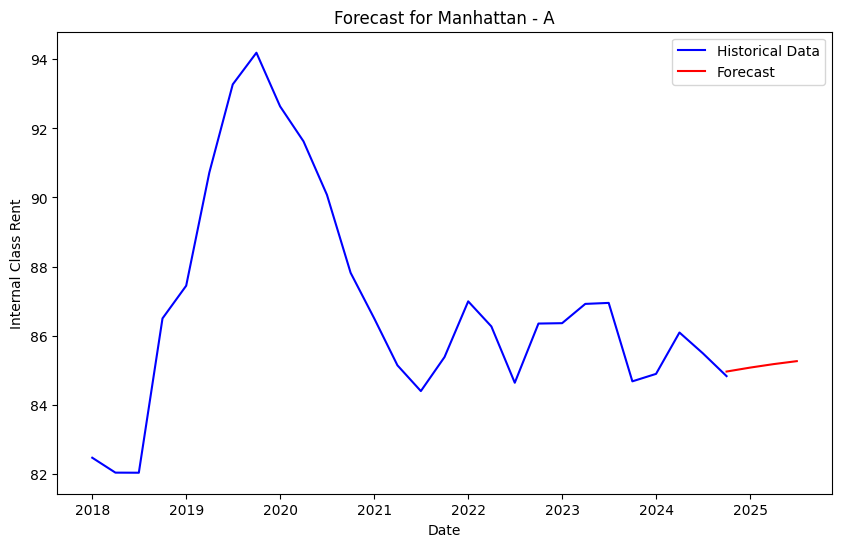


📈 Forecast Preview:
        date   forecast     market internal_class
0 2024-10-01  84.959842  Manhattan              A
1 2025-01-01  85.074617  Manhattan              A
2 2025-04-01  85.174404  Manhattan              A
3 2025-07-01  85.261160  Manhattan              A


In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define a minimum sample size
MIN_SAMPLE_SIZE = 1

# Initialize the list to store forecast results
forecast_data = []

# Focus on 'Manhattan' market
specific_market = 'Manhattan'  # Market = Manhattan
specific_internal_class = 'A'  # Example internal_class (A or O)

# Filter data for 'Manhattan' and a specific 'internal_class'
df_filtered = df_tech[(df_tech['market'] == specific_market) & 
                      (df_tech['internal_class'] == specific_internal_class)]

# Check if the filtered data is not empty
if df_filtered.empty:
    print(f"❌ No data found for {specific_market} and {specific_internal_class}. Skipping.")
else:
    print(f"🔍 Processing data for {specific_market} - {specific_internal_class}")
    
    # Convert 'year' and 'quarter' to a valid datetime index
    def quarter_to_date(year, quarter):
        quarter_start_month = {'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10}
        start_month = quarter_start_month.get(quarter, 1)
        return pd.Timestamp(year=int(year), month=start_month, day=1)

    # Convert 'year' and 'quarter' to datetime and set it as the index
    df_filtered['date'] = df_filtered.apply(lambda row: quarter_to_date(row['year'], row['quarter']), axis=1)
    df_filtered.set_index('date', inplace=True)
    
    # Create time series for 'internal_class_rent'
    ts = df_filtered[['internal_class_rent']].copy()
    ts = ts.sort_index()

    # Ensure no missing dates (optional: can forward fill missing dates)
    ts = ts[~ts.index.duplicated(keep='first')]
    ts = ts.asfreq('QS')  # Set as Quarterly Start frequency

    # Check if there's enough data
    if len(ts) < MIN_SAMPLE_SIZE:
        print(f"❌ Not enough data for {specific_market}, {specific_internal_class}. Skipping this group.")
    else:
        try:
            # Fit ARIMA model (without seasonal components)
            model = ARIMA(ts['internal_class_rent'], order=(1, 0, 0))  # ARIMA (p, d, q)
            model_fit = model.fit()

            # Print the summary of the model for detailed diagnostics
            print(f"\nModel Summary for {specific_market} - {specific_internal_class}:")
            print(model_fit.summary())

            # Forecast the next 4 quarters (1 year ahead)
            forecast = model_fit.forecast(steps=4)

            # Generate future dates for the forecast (Quarterly start dates)
            # Align the start of forecast to the *next quarter* after the last actual date
            last_date = ts.index[-2]

            # If already on a quarter start, just add one quarter
            if last_date.is_quarter_start:
                start_date = last_date + pd.offsets.QuarterBegin()
            else:
                # Otherwise get to the next quarter start
                start_date = pd.Timestamp(last_date) + pd.offsets.QuarterBegin(startingMonth=last_date.month)

            # Generate forecast dates
            future_dates = pd.date_range(start=start_date, periods=4, freq='QS')


            # Create a DataFrame for the forecast results
            forecast_df = pd.DataFrame({
                'date': future_dates,
                'forecast': forecast,
                'market': specific_market,
                'internal_class': specific_internal_class
            })
            forecast_data.append(forecast_df)

            # Optional: Plot the forecast along with the original series
            plt.figure(figsize=(10, 6))
            plt.plot(ts.index, ts['internal_class_rent'], label='Historical Data', color='blue')
            plt.plot(future_dates, forecast, label='Forecast', color='red')
            plt.title(f"Forecast for {specific_market} - {specific_internal_class}")
            plt.xlabel('Date')
            plt.ylabel('Internal Class Rent')
            plt.legend()
            plt.show()

        except Exception as e:
            print(f"❌ Error with ARIMA for {specific_market}, {specific_internal_class}: {e}. Skipping this group.")

# Combine all forecast data into a single DataFrame
if forecast_data:
    forecast_results_df = pd.concat(forecast_data, ignore_index=True)
    # Optional: Save the forecast results to a CSV file
    forecast_results_df.to_csv('manhattan_forecast_results_arima.csv', index=False)

    # Preview the forecast results
    print("\n📈 Forecast Preview:")
    print(forecast_results_df.head(10))
else:
    print("❌ No forecasts generated.")


##### first attempt

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming `df` is your DataFrame containing the time series data
# Prepare the date index
df['date'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].astype(str))
df.set_index('date', inplace=True)

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
result = adfuller(df['internal_class_rent'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, data is non-stationary; otherwise, it's stationary
if result[1] > 0.05:
    print("The time series is non-stationary. Differencing is required.")
else:
    print("The time series is stationary.")

# Plot ACF and PACF to determine AR, MA orders
plot_acf(df['internal_class_rent'], lags=40)
plot_pacf(df['internal_class_rent'], lags=40)
plt.show()




C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\1459076771.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + 'Q' + df['quarter'].astype(str))


DateParseError: Unknown datetime string format, unable to parse: 2018QQ1, at position 0

In [ ]:

# Fit a SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, S=4)
sarima_model = SARIMAX(df['internal_class_rent'], 
                       order=(1, 1, 1),  # ARIMA order (p, d, q)
                       seasonal_order=(1, 1, 1, 4))  # Seasonal order (P, D, Q, S), S=4 for quarterly data
sarima_model_fit = sarima_model.fit(disp=False)

# Print model summary to get p-values and other statistics
print(sarima_model_fit.summary())

# Evaluate AIC to compare model fits (lower AIC is better)
print(f"AIC: {sarima_model_fit.aic}")


In [ ]:
# Forecast next 4 quarters (1 year)
forecast_steps = 4
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print forecast values and confidence intervals
print(f"Forecasted values (next 4 quarters):\n{forecast_mean}")
print(f"Confidence intervals:\n{forecast_conf_int}")

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['internal_class_rent'], label="Historical Data")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title("SARIMA Forecast for Internal Class Rent (Next 1 Year)")
plt.legend(loc="best")
plt.show()

In [ ]:
# Check residuals of the model
residuals = sarima_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.show()

# Perform Ljung-Box test on residuals to check for autocorrelation
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"Ljung-Box Test Results:\n{ljung_box_test}")

# Check histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

# Check if residuals are normally distributed (QQ-Plot)
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# Calculate residual diagnostics (p-values, etc.)
print(f"Mean of residuals: {residuals.mean()}")
print(f"Standard deviation of residuals: {residuals.std()}")

In [ ]:
# to save the values to the df

# Forecast next 4 quarters (1 year)
forecast_steps = 4
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a new DataFrame with forecasted values and confidence intervals
forecast_df = pd.DataFrame(forecast_mean, columns=['forecast'], index=forecast_mean.index)
forecast_conf_df = pd.DataFrame(forecast_conf_int, columns=['lower_ci', 'upper_ci'], index=forecast_conf_int.index)

# Merge the forecasted values and confidence intervals back to the original DataFrame
forecast_combined = pd.concat([df, forecast_df, forecast_conf_df], axis=1)

# Display the combined DataFrame with historical and forecasted values
print(forecast_combined.tail(10))  # Check the last few rows to see the forecast added

# Optionally, save it to a new CSV file
forecast_combined.to_csv('forecasted_internal_class_rent.csv')


### growth index

##### tech


🔍 Processing: Market = Atlanta
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   5.907
Date:                   Sun, 13 Apr 2025   AIC                             -7.814
Time:                           11:05:13   BIC                             -7.922
Sample:                       01-01-2018   HQIC                            -9.151
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8351      0.056     14.871      0.000       0.725       0.945
sigma2         0.0108      0.008      1.400      0.161      -0.004       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


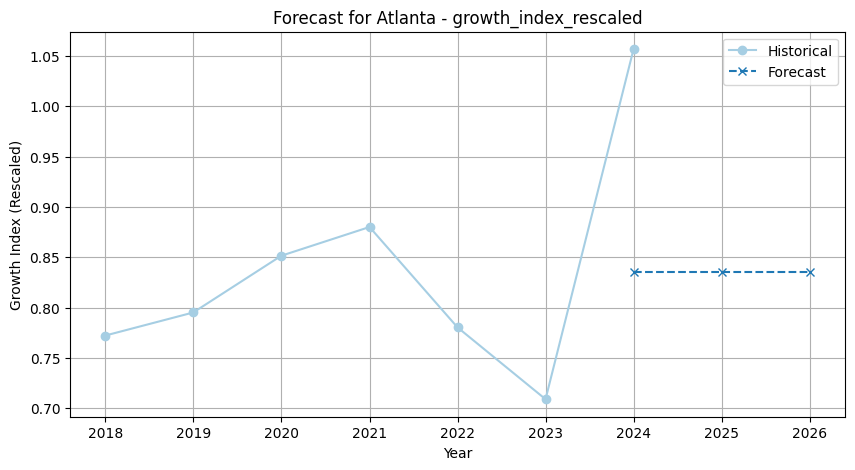


🔍 Processing: Market = Austin
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   8.888
Date:                   Sun, 13 Apr 2025   AIC                            -13.776
Time:                           11:05:13   BIC                            -13.884
Sample:                       01-01-2018   HQIC                           -15.113
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.038      9.979      0.000       0.303       0.450
sigma2         0.0046      0.003      1.395      0.163      -0.002       0.0

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


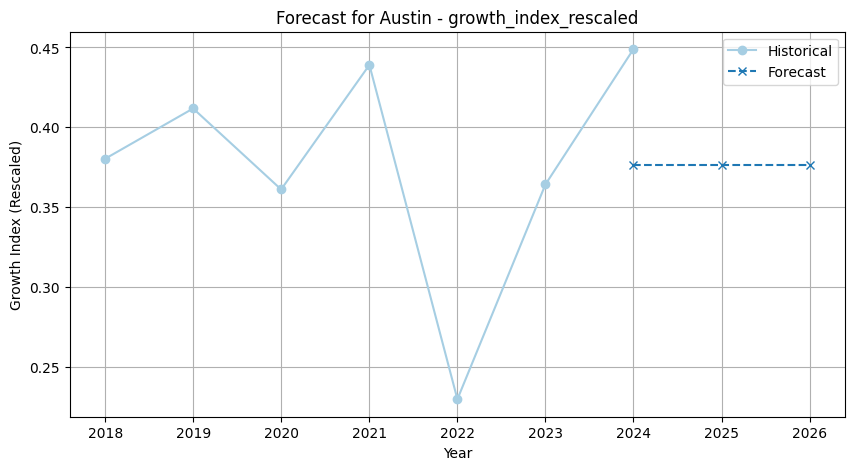


🔍 Processing: Market = Baltimore
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   9.289
Date:                   Sun, 13 Apr 2025   AIC                            -14.577
Time:                           11:05:14   BIC                            -14.685
Sample:                       01-01-2018   HQIC                           -15.914
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4175      0.025     17.040      0.000       0.369       0.466
sigma2         0.0041      0.004      0.934      0.350      -0.005       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


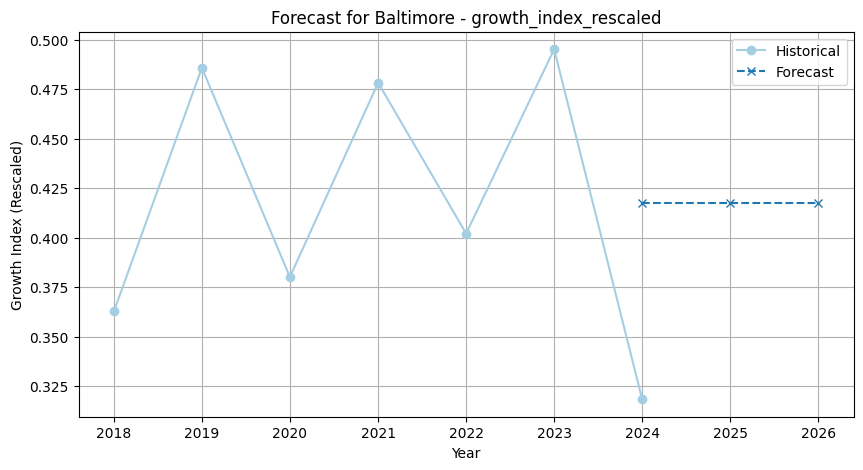


🔍 Processing: Market = Boston
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  12.748
Date:                   Sun, 13 Apr 2025   AIC                            -21.497
Time:                           11:05:14   BIC                            -21.605
Sample:                       01-01-2018   HQIC                           -22.834
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6614      0.015     43.628      0.000       0.632       0.691
sigma2         0.0015      0.001      1.743      0.081      -0.000       0.0

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


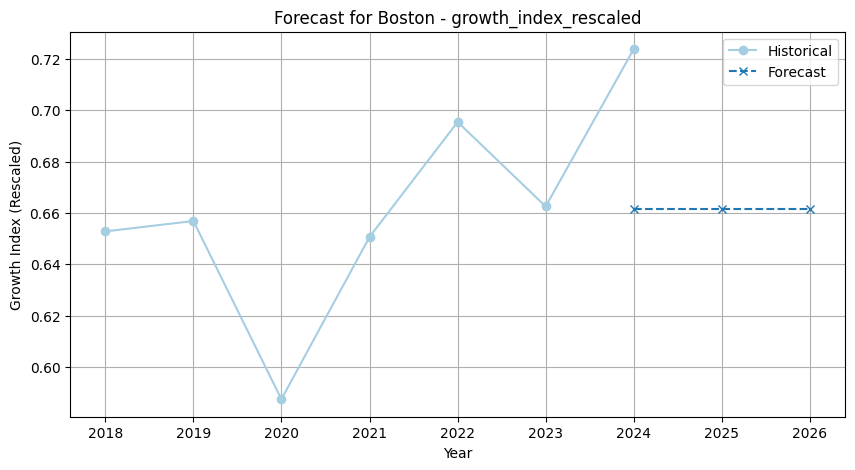


🔍 Processing: Market = Charlotte
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   1.737
Date:                   Sun, 13 Apr 2025   AIC                              0.527
Time:                           11:05:14   BIC                              0.419
Sample:                       01-01-2018   HQIC                            -0.810
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6204      0.169      3.680      0.000       0.290       0.951
sigma2         0.0356      0.035      1.016      0.310      -0.033       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


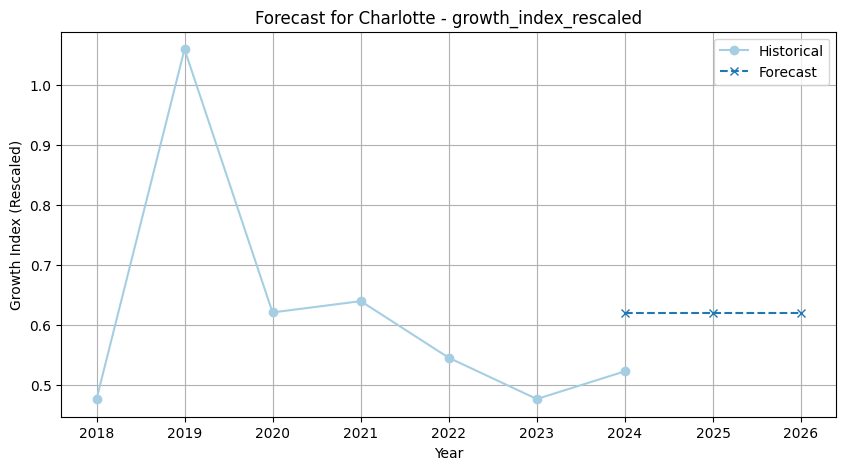


🔍 Processing: Market = Chicago Suburbs
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   3.936
Date:                   Sun, 13 Apr 2025   AIC                             -3.871
Time:                           11:05:15   BIC                             -3.979
Sample:                       01-01-2018   HQIC                            -5.208
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6287      0.056     11.179      0.000       0.518       0.739
sigma2         0.0190      0.018      1.060      0.289      -0.016 

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


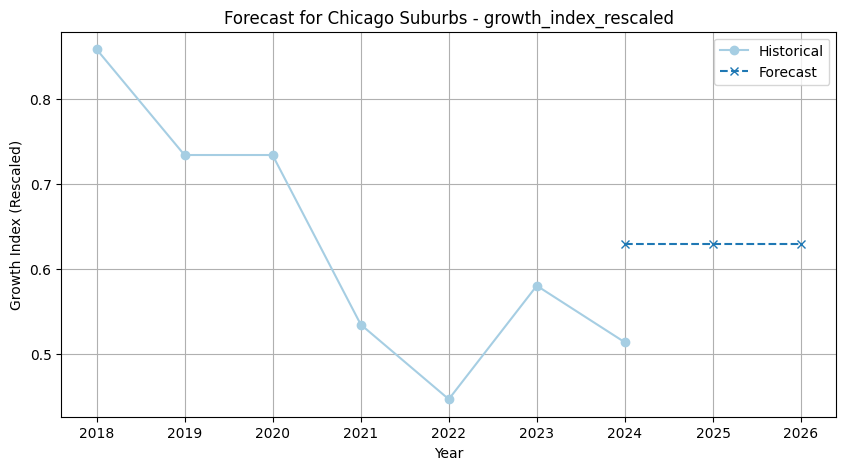


🔍 Processing: Market = Detroit
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  -0.936
Date:                   Sun, 13 Apr 2025   AIC                              5.871
Time:                           11:05:15   BIC                              5.763
Sample:                       01-01-2018   HQIC                             4.534
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4010      0.152      2.641      0.008       0.103       0.699
sigma2         0.0765      0.058      1.329      0.184      -0.036       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


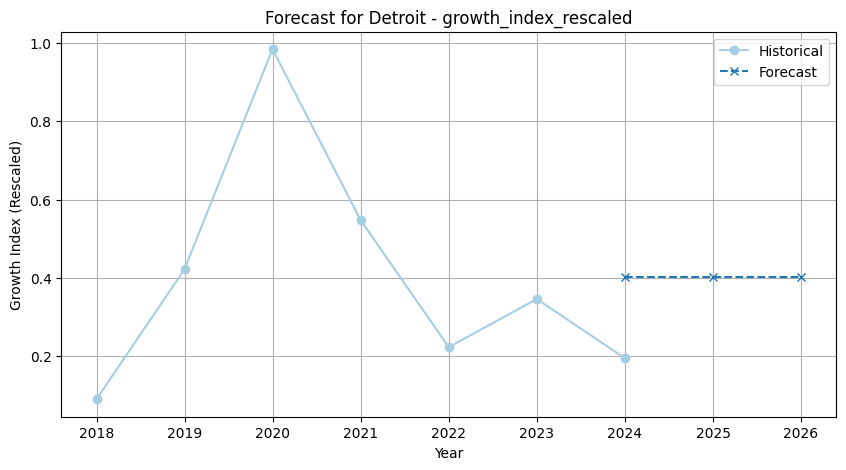


🔍 Processing: Market = Houston
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   6.384
Date:                   Sun, 13 Apr 2025   AIC                             -8.767
Time:                           11:05:16   BIC                             -8.875
Sample:                       01-01-2018   HQIC                           -10.104
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5454      0.063      8.686      0.000       0.422       0.668
sigma2         0.0094      0.008      1.166      0.244      -0.006       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


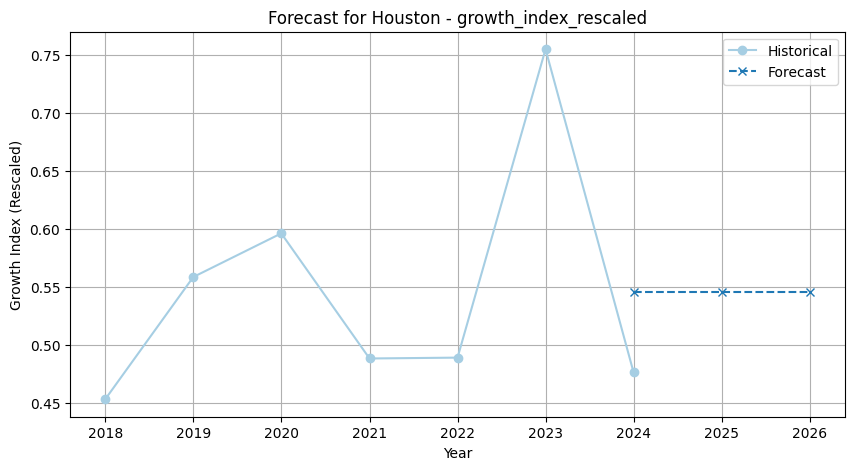


🔍 Processing: Market = Los Angeles
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  10.603
Date:                   Sun, 13 Apr 2025   AIC                            -17.205
Time:                           11:05:16   BIC                            -17.313
Sample:                       01-01-2018   HQIC                           -18.542
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3678      0.021     17.121      0.000       0.326       0.410
sigma2         0.0028      0.002      1.702      0.089      -0.000     

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


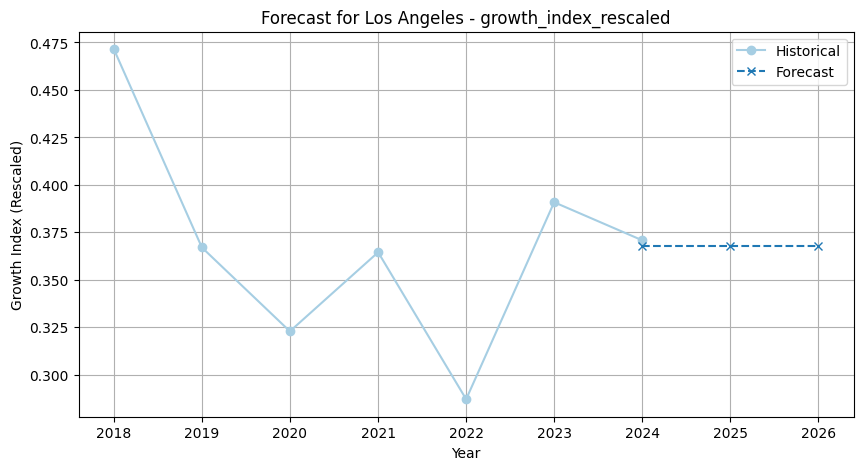


🔍 Processing: Market = Manhattan
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  20.040
Date:                   Sun, 13 Apr 2025   AIC                            -36.080
Time:                           11:05:17   BIC                            -36.189
Sample:                       01-01-2018   HQIC                           -37.417
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3675      0.007     55.952      0.000       0.355       0.380
sigma2         0.0002      0.000      0.667      0.505      -0.000       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


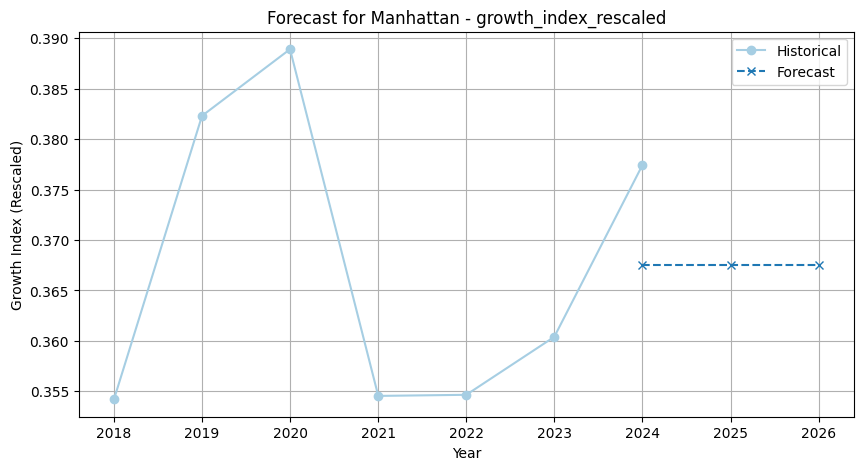


🔍 Processing: Market = Nashville
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    6
Model:                             ARIMA   Log Likelihood                  -1.832
Date:                   Sun, 13 Apr 2025   AIC                              7.664
Time:                           11:05:17   BIC                              7.247
Sample:                       01-01-2019   HQIC                             5.997
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4753      0.148      3.213      0.001       0.185       0.765
sigma2         0.1078      0.099      1.093      0.274      -0.085       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


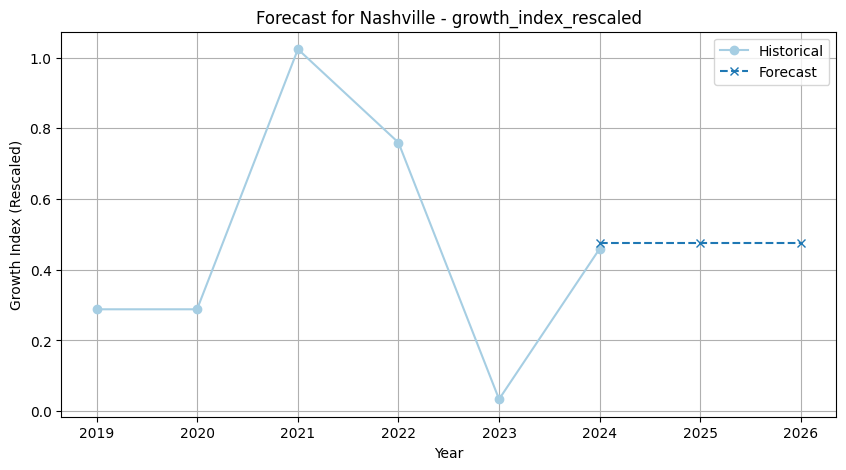


🔍 Processing: Market = Northern New Jersey
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   5.707
Date:                   Sun, 13 Apr 2025   AIC                             -7.413
Time:                           11:05:17   BIC                             -7.521
Sample:                       01-01-2018   HQIC                            -8.750
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1467      0.057      2.585      0.010       0.035       0.258
sigma2         0.0115      0.013      0.877      0.381      -0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


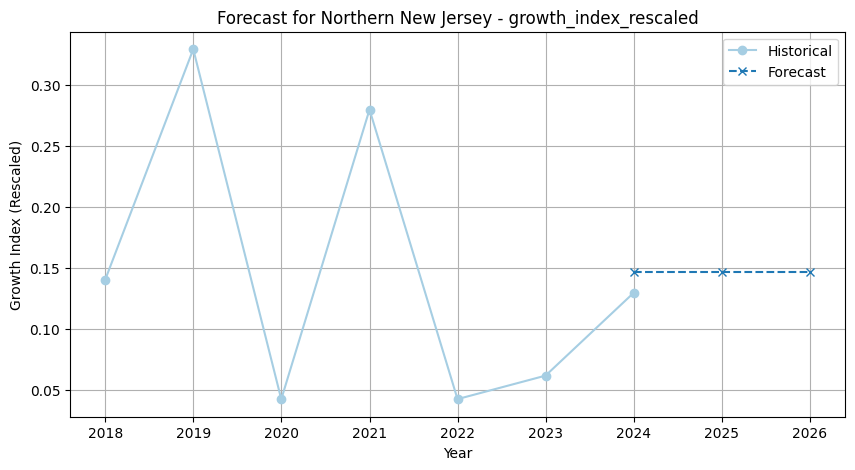


🔍 Processing: Market = Northern Virginia
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  11.519
Date:                   Sun, 13 Apr 2025   AIC                            -19.038
Time:                           11:05:18   BIC                            -19.146
Sample:                       01-01-2018   HQIC                           -20.375
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.018      0.301      0.764      -0.031       0.042
sigma2         0.0022      0.001      1.822      0.068      -0.00

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


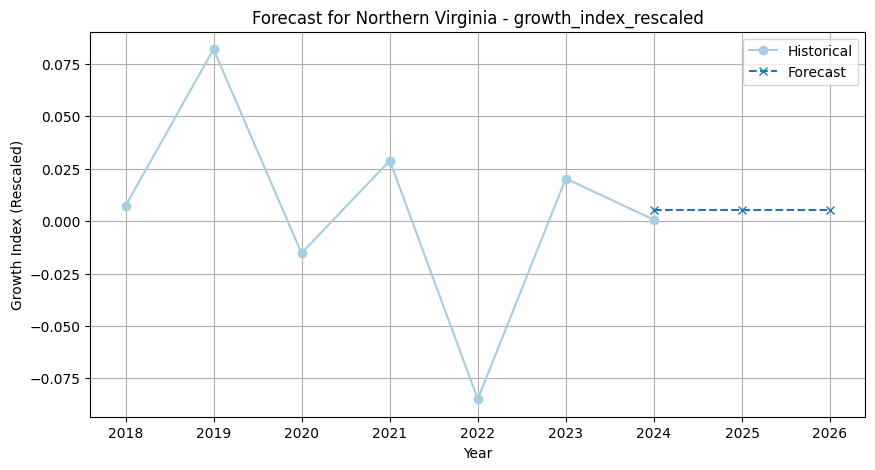


🔍 Processing: Market = Philadelphia
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  11.421
Date:                   Sun, 13 Apr 2025   AIC                            -18.843
Time:                           11:05:19   BIC                            -18.951
Sample:                       01-01-2018   HQIC                           -20.180
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8104      0.018     44.267      0.000       0.774       0.846
sigma2         0.0022      0.001      1.860      0.063      -0.000    

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


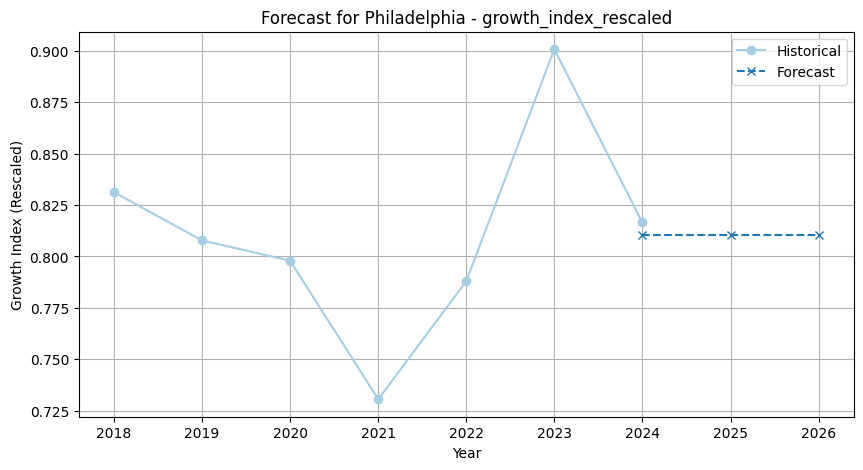


🔍 Processing: Market = Phoenix
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.242
Date:                   Sun, 13 Apr 2025   AIC                            -10.484
Time:                           11:05:19   BIC                            -10.592
Sample:                       01-01-2018   HQIC                           -11.821
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8998      0.072     12.432      0.000       0.758       1.042
sigma2         0.0074      0.007      1.016      0.310      -0.007       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


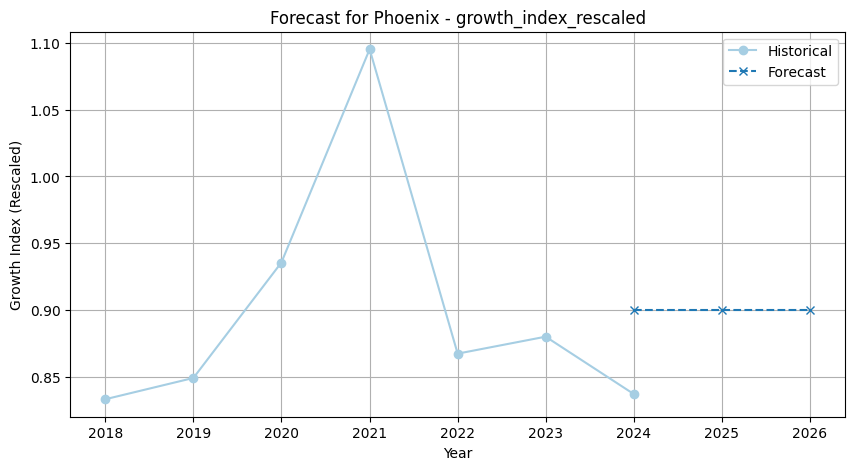


🔍 Processing: Market = Salt Lake City
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    6
Model:                             ARIMA   Log Likelihood                   3.311
Date:                   Sun, 13 Apr 2025   AIC                             -2.622
Time:                           11:05:20   BIC                             -3.038
Sample:                       01-01-2019   HQIC                            -4.289
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4168      0.065     -6.387      0.000      -0.545      -0.289
sigma2         0.0194      0.025      0.779      0.436      -0.029  

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


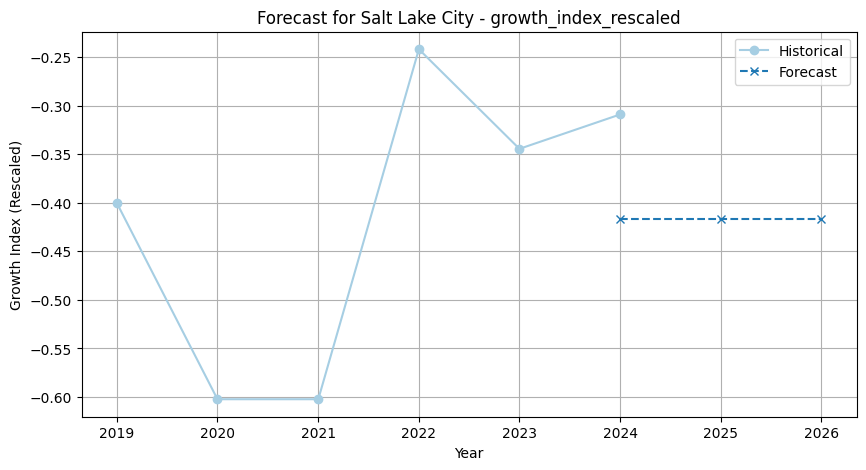


🔍 Processing: Market = San Diego
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   1.866
Date:                   Sun, 13 Apr 2025   AIC                              0.268
Time:                           11:05:20   BIC                              0.160
Sample:                       01-01-2018   HQIC                            -1.069
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0455      0.070      0.647      0.518      -0.092       0.183
sigma2         0.0344      0.022      1.543      0.123      -0.009       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


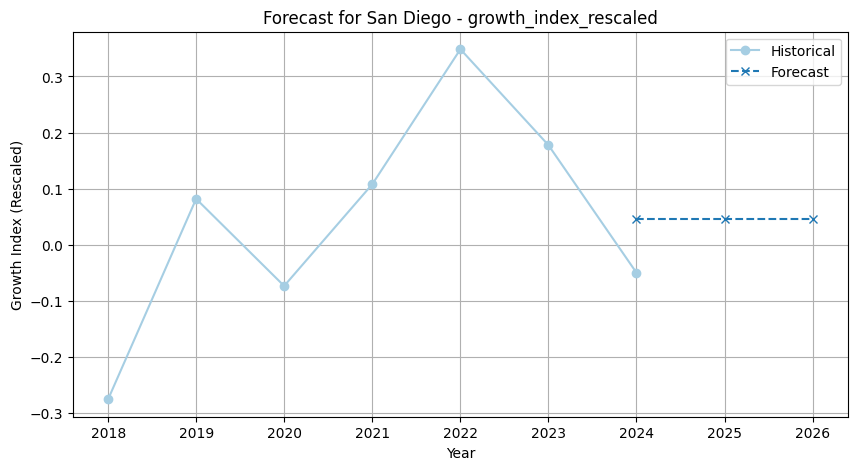


🔍 Processing: Market = San Francisco
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  11.929
Date:                   Sun, 13 Apr 2025   AIC                            -19.858
Time:                           11:05:21   BIC                            -19.966
Sample:                       01-01-2018   HQIC                           -21.195
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4957      0.023     21.738      0.000       0.451       0.540
sigma2         0.0019      0.001      1.524      0.128      -0.001   

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


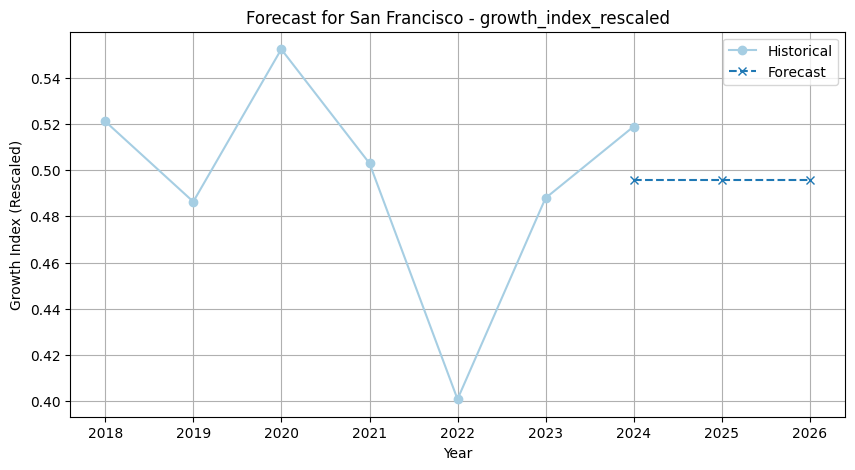


🔍 Processing: Market = Seattle
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  12.706
Date:                   Sun, 13 Apr 2025   AIC                            -21.412
Time:                           11:05:21   BIC                            -21.521
Sample:                       01-01-2018   HQIC                           -22.750
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6357      0.019     32.801      0.000       0.598       0.674
sigma2         0.0016      0.001      1.700      0.089      -0.000       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


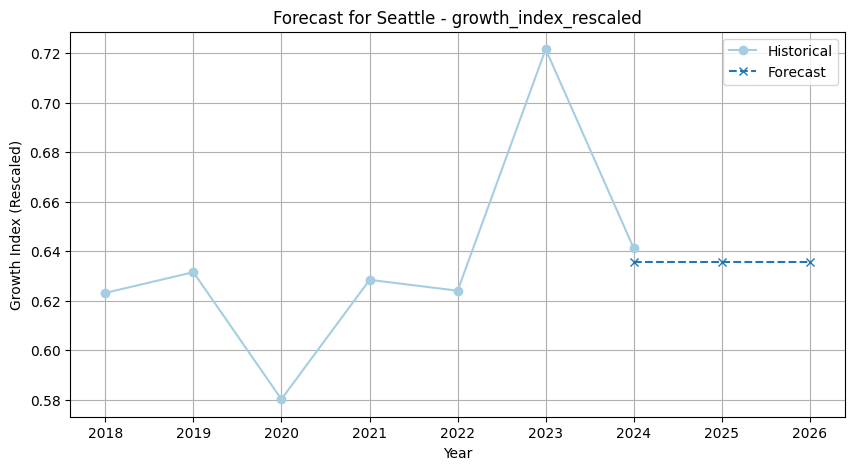


🔍 Processing: Market = South Florida
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   2.771
Date:                   Sun, 13 Apr 2025   AIC                             -1.542
Time:                           11:05:21   BIC                             -1.650
Sample:                       01-01-2018   HQIC                            -2.879
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5810      0.092      6.300      0.000       0.400       0.762
sigma2         0.0265      0.023      1.167      0.243      -0.018   

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


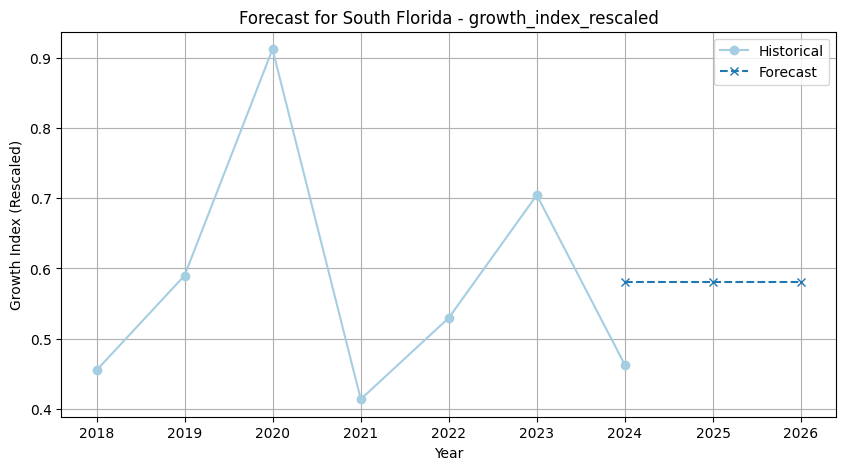


🔍 Processing: Market = Tampa
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.193
Date:                   Sun, 13 Apr 2025   AIC                            -10.385
Time:                           11:05:22   BIC                            -10.493
Sample:                       01-01-2018   HQIC                           -11.722
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2045      0.042      4.857      0.000       0.122       0.287
sigma2         0.0075      0.007      1.033      0.302      -0.007       0.02

C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_23160\2312861504.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),


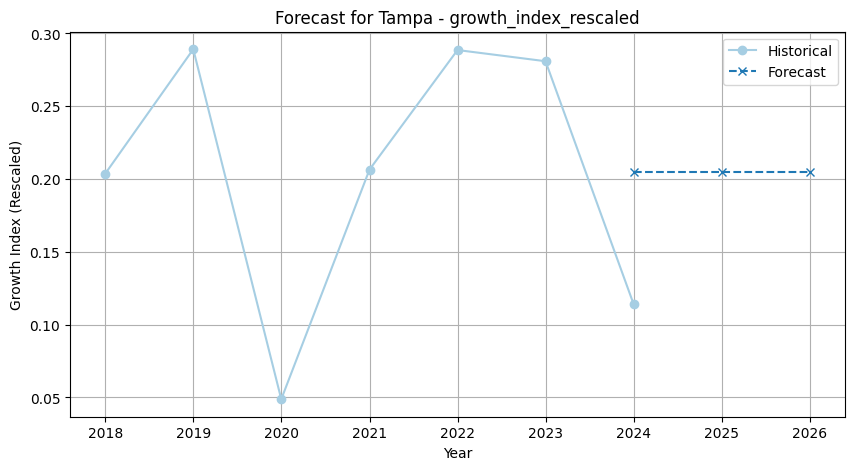


📈 Forecast Preview:
        date  forecast   market
0 2024-01-01  0.835059  Atlanta
1 2025-01-01  0.835059  Atlanta
2 2026-01-01  0.835059  Atlanta
3 2024-01-01  0.376445   Austin
4 2025-01-01  0.376445   Austin


In [43]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Replace this with your actual DataFrame
df = df_tech.copy()
forecast_data = []
forecast_years = 3

# Ensure year is an integer
df['year'] = df['year'].astype(int)

# Loop through each market
for market, group_df in df.groupby('market'):
    print(f"\n🔍 Processing: Market = {market}")
    
    # Aggregate to one value per year if necessary (mean is a safe default)
    ts = group_df.groupby('year')['growth_index_rescaled'].mean()

    # Build complete annual index from min to max year
    all_years = pd.RangeIndex(start=ts.index.min(), stop=ts.index.max() + 1)
    ts = ts.reindex(all_years)

    # Impute missing values
    ts = ts.ffill().bfill()

    # Convert to time series with datetime index
    ts.index = pd.to_datetime(ts.index.astype(str), format='%Y')
    ts = ts.asfreq('AS')  # Annual Start

    try:
        # Fit ARIMA model (non-seasonal)
        model = ARIMA(ts, order=(0, 0, 0))
        model_fit = model.fit()

        # Summary for diagnostics
        print(model_fit.summary())

        # Forecast next n years
        forecast = model_fit.forecast(steps=forecast_years)
        future_dates = pd.date_range(start=ts.index[-2] + pd.offsets.YearBegin(),
                                     periods=forecast_years, freq='AS')

        # Store forecast
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market
        })

        forecast_data.append(forecast_df)

        # Optional: Plot
        plt.figure(figsize=(10, 5))
        plt.plot(ts.index, ts, label='Historical', marker='o')
        plt.plot(future_dates, forecast, label='Forecast', marker='x', linestyle='--')
        plt.title(f"Forecast for {market} - growth_index_rescaled")
        plt.xlabel('Year')
        plt.ylabel('Growth Index (Rescaled)')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}: {e}. Skipping.")

# Combine all forecasts
if forecast_data:
    forecast_results_df = pd.concat(forecast_data, ignore_index=True)
    forecast_results_df.to_csv('tech_annual_growth_index_forecast.csv', index=False)
    print("\n📈 Forecast Preview:")
    print(forecast_results_df.head())
else:
    print("❌ No forecasts generated.")


##### legal


🔍 Processing: Market = Atlanta
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   8.477
Date:                   Sat, 12 Apr 2025   AIC                            -12.954
Time:                           23:10:27   BIC                            -13.062
Sample:                       01-01-2018   HQIC                           -14.291
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6870      0.029     23.955      0.000       0.631       0.743
sigma2         0.0052      0.004      1.342      0.180      -0.002       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


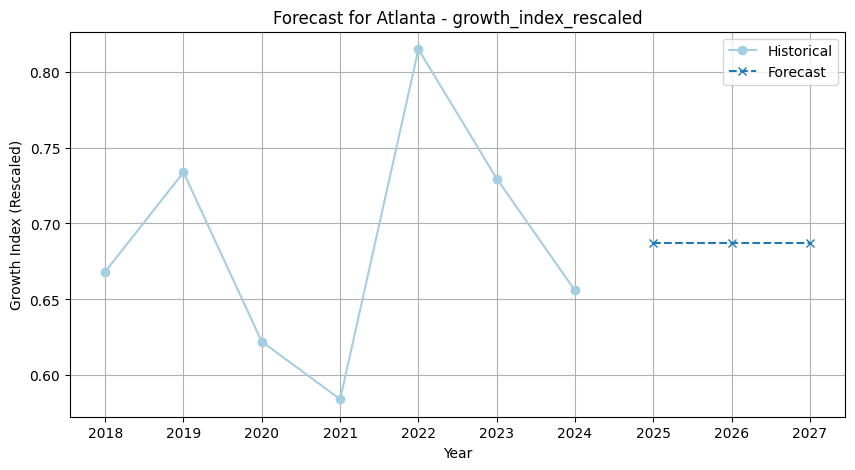


🔍 Processing: Market = Austin
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.528
Date:                   Sat, 12 Apr 2025   AIC                            -11.055
Time:                           23:10:27   BIC                            -11.163
Sample:                       01-01-2018   HQIC                           -12.392
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7114      0.047     15.286      0.000       0.620       0.803
sigma2         0.0068      0.006      1.125      0.261      -0.005       0.0

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


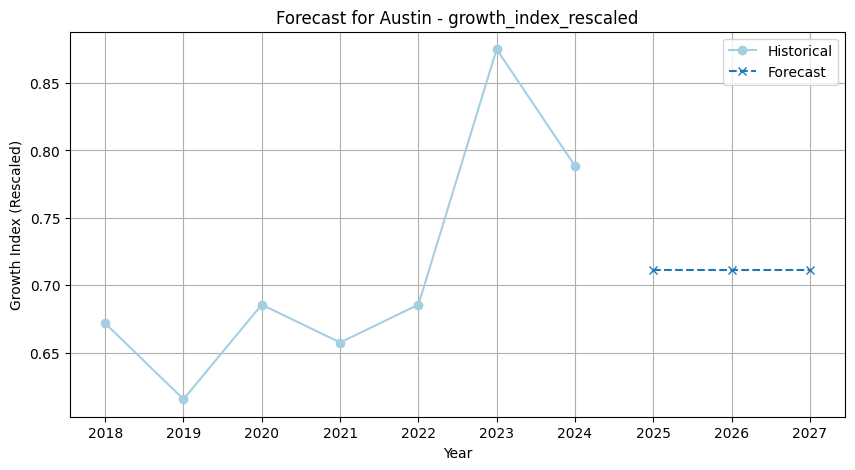


🔍 Processing: Market = Baltimore
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   1.977
Date:                   Sat, 12 Apr 2025   AIC                              0.047
Time:                           23:10:27   BIC                             -0.061
Sample:                       01-01-2018   HQIC                            -1.290
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7562      0.085      8.924      0.000       0.590       0.922
sigma2         0.0333      0.043      0.780      0.435      -0.050       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


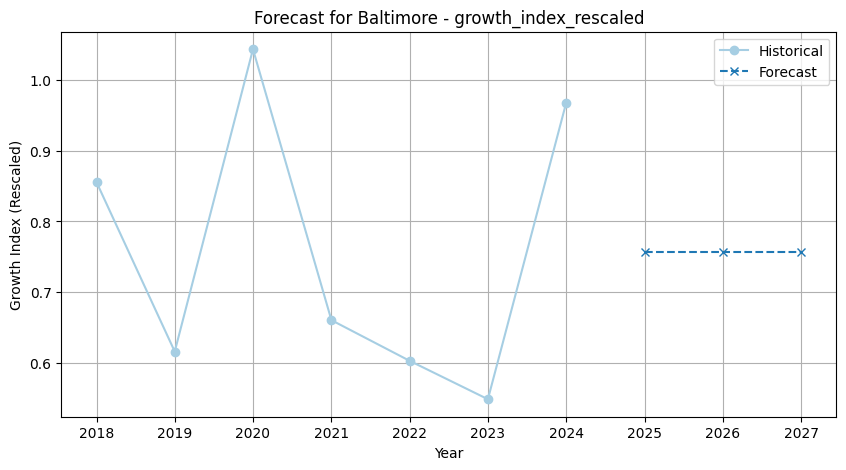


🔍 Processing: Market = Boston
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   5.836
Date:                   Sat, 12 Apr 2025   AIC                             -7.672
Time:                           23:10:28   BIC                             -7.780
Sample:                       01-01-2018   HQIC                            -9.009
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7874      0.040     19.814      0.000       0.710       0.865
sigma2         0.0110      0.008      1.348      0.178      -0.005       0.0

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


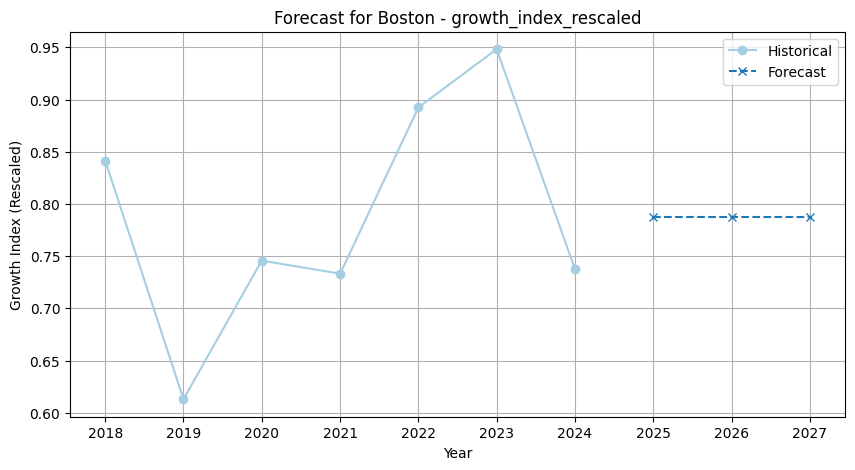


🔍 Processing: Market = Charlotte
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  -3.526
Date:                   Sat, 12 Apr 2025   AIC                             11.052
Time:                           23:10:28   BIC                             10.944
Sample:                       01-01-2018   HQIC                             9.715
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1646      0.522      2.233      0.026       0.142       2.187
sigma2         0.1603      0.215      0.744      0.457      -0.262       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


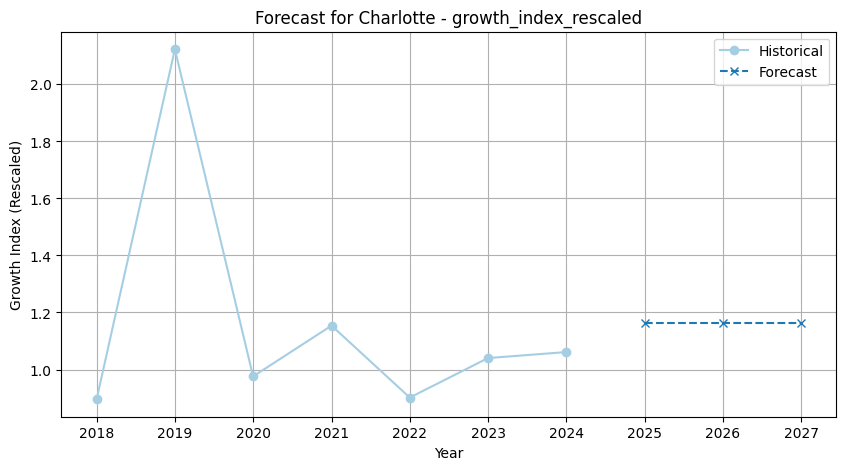


🔍 Processing: Market = Chicago Suburbs
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    6
Model:                             ARIMA   Log Likelihood                  -4.952
Date:                   Sat, 12 Apr 2025   AIC                             13.904
Time:                           23:10:28   BIC                             13.487
Sample:                       01-01-2018   HQIC                            12.236
                            - 01-01-2023                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2193      0.914      0.240      0.810      -1.572       2.010
sigma2         0.3050      0.580      0.526      0.599      -0.833 

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


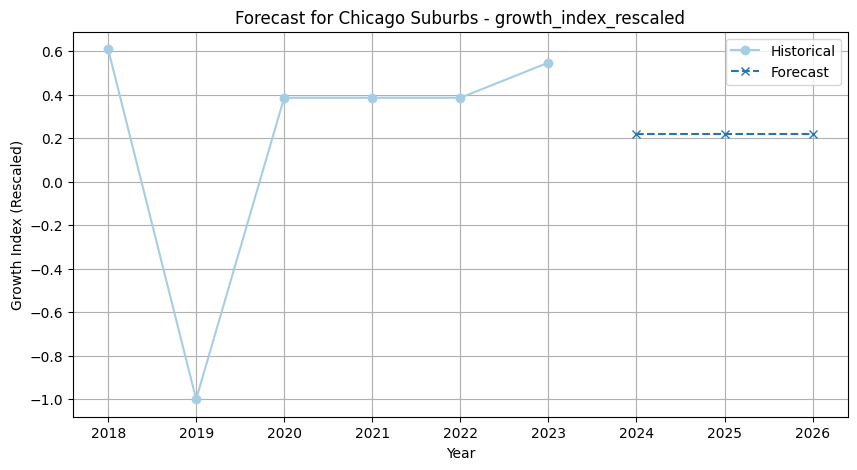


🔍 Processing: Market = Detroit
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    6
Model:                             ARIMA   Log Likelihood                   7.153
Date:                   Sat, 12 Apr 2025   AIC                            -10.306
Time:                           23:10:29   BIC                            -10.722
Sample:                       01-01-2019   HQIC                           -11.973
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8284      0.030     27.600      0.000       0.770       0.887
sigma2         0.0054      0.005      1.126      0.260      -0.004       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


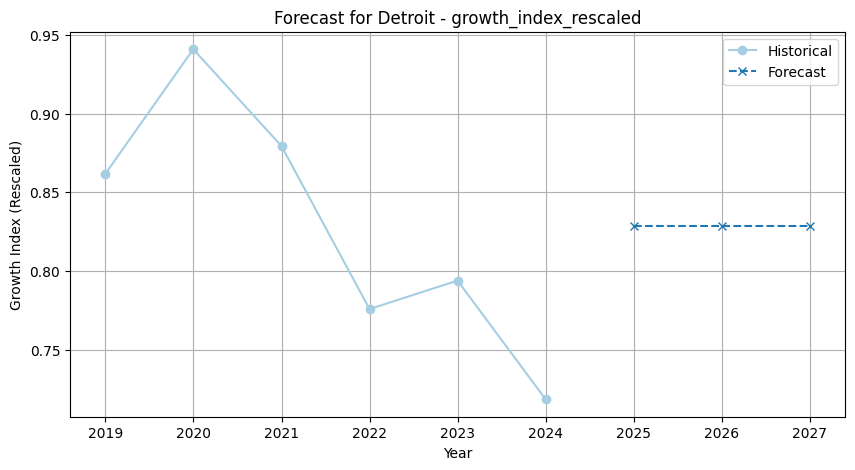


🔍 Processing: Market = Houston
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   8.412
Date:                   Sat, 12 Apr 2025   AIC                            -12.823
Time:                           23:10:29   BIC                            -12.931
Sample:                       01-01-2018   HQIC                           -14.160
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6012      0.030     20.311      0.000       0.543       0.659
sigma2         0.0053      0.007      0.753      0.452      -0.008       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


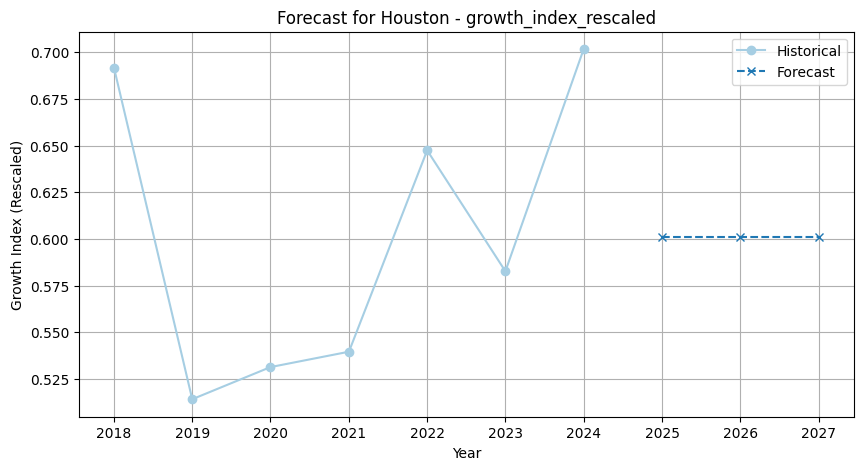


🔍 Processing: Market = Los Angeles
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.500
Date:                   Sat, 12 Apr 2025   AIC                            -11.001
Time:                           23:10:29   BIC                            -11.109
Sample:                       01-01-2018   HQIC                           -12.338
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5152      0.042     12.245      0.000       0.433       0.598
sigma2         0.0069      0.004      1.614      0.107      -0.001     

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


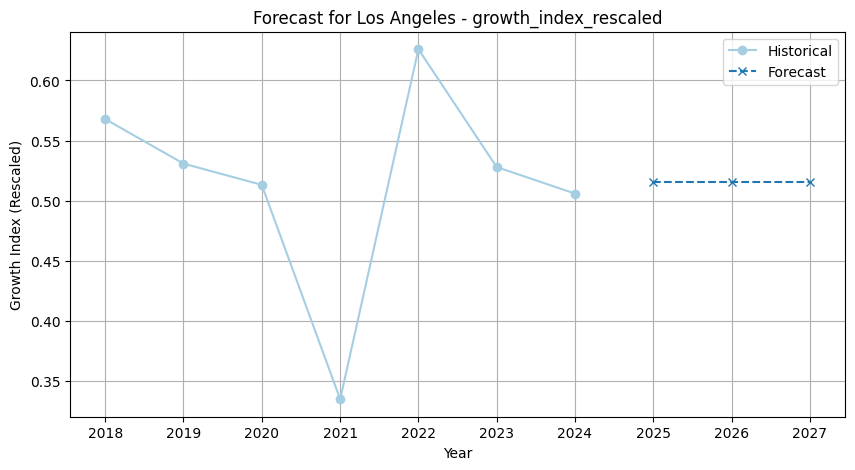


🔍 Processing: Market = Manhattan
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  17.274
Date:                   Sat, 12 Apr 2025   AIC                            -30.549
Time:                           23:10:29   BIC                            -30.657
Sample:                       01-01-2018   HQIC                           -31.886
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3057      0.009     35.284      0.000       0.289       0.323
sigma2         0.0004      0.000      1.040      0.298      -0.000       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


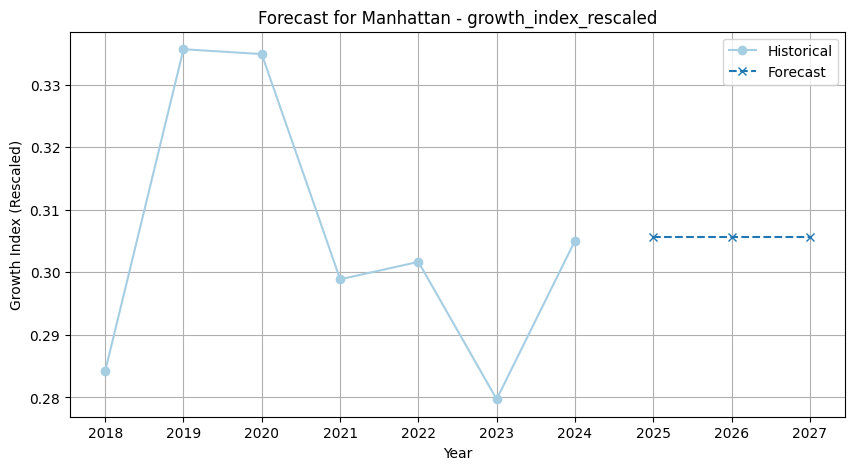


🔍 Processing: Market = Nashville
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    6
Model:                             ARIMA   Log Likelihood                  -0.617
Date:                   Sat, 12 Apr 2025   AIC                              5.234
Time:                           23:10:30   BIC                              4.817
Sample:                       01-01-2019   HQIC                             3.566
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4008      0.119      3.356      0.001       0.167       0.635
sigma2         0.0719      0.063      1.149      0.251      -0.051       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


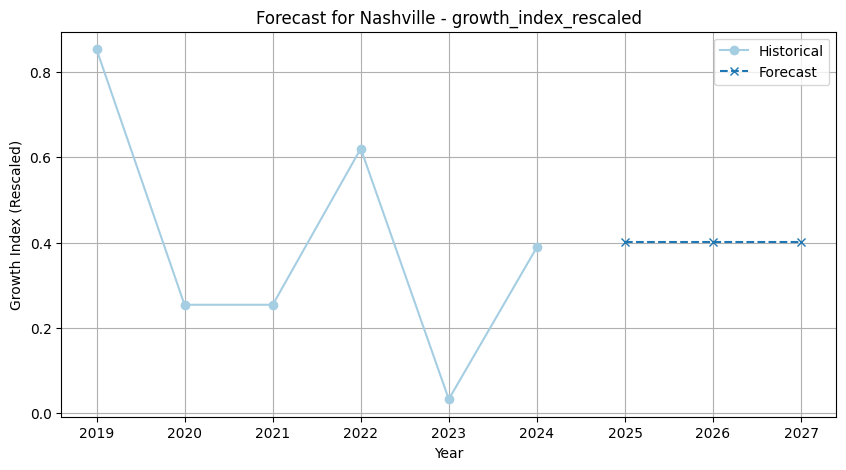


🔍 Processing: Market = Northern New Jersey
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   2.676
Date:                   Sat, 12 Apr 2025   AIC                             -1.352
Time:                           23:10:30   BIC                             -1.460
Sample:                       01-01-2018   HQIC                            -2.689
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5454      0.066      8.226      0.000       0.415       0.675
sigma2         0.0273      0.023      1.204      0.229      -0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


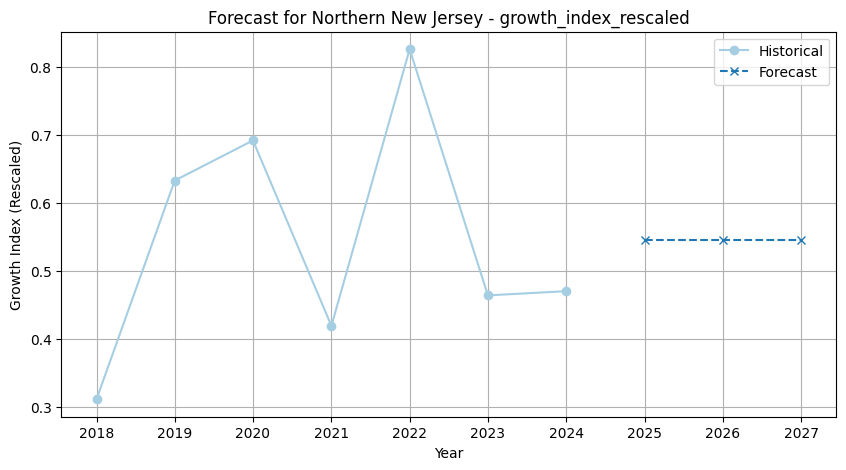


🔍 Processing: Market = Northern Virginia
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   4.265
Date:                   Sat, 12 Apr 2025   AIC                             -4.530
Time:                           23:10:30   BIC                             -4.638
Sample:                       01-01-2018   HQIC                            -5.867
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1608      0.088      1.832      0.067      -0.011       0.333
sigma2         0.0173      0.018      0.956      0.339      -0.01

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


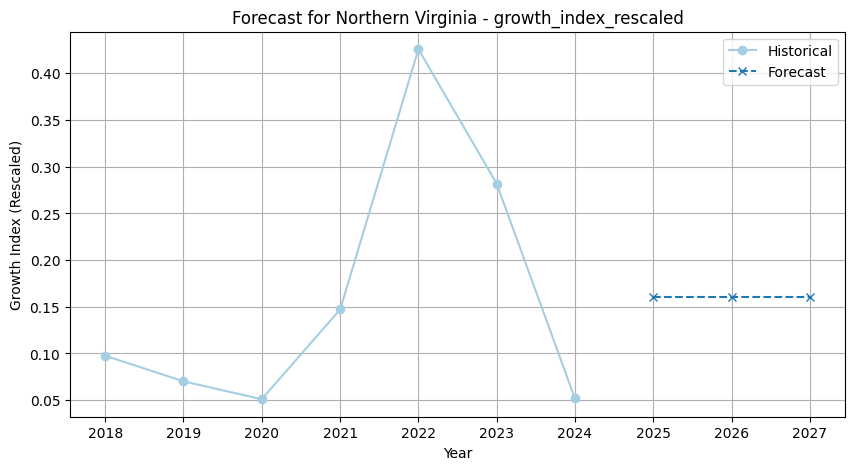


🔍 Processing: Market = Philadelphia
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   3.259
Date:                   Sat, 12 Apr 2025   AIC                             -2.518
Time:                           23:10:30   BIC                             -2.627
Sample:                       01-01-2018   HQIC                            -3.856
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8380      0.057     14.593      0.000       0.725       0.951
sigma2         0.0231      0.020      1.165      0.244      -0.016    

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


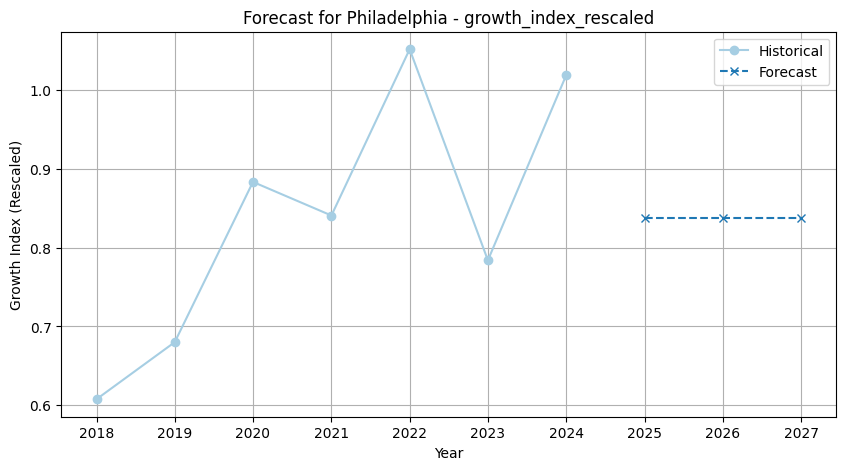


🔍 Processing: Market = Phoenix
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   0.897
Date:                   Sat, 12 Apr 2025   AIC                              2.207
Time:                           23:10:31   BIC                              2.098
Sample:                       01-01-2018   HQIC                             0.869
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7025      0.085      8.286      0.000       0.536       0.869
sigma2         0.0453      0.027      1.702      0.089      -0.007       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


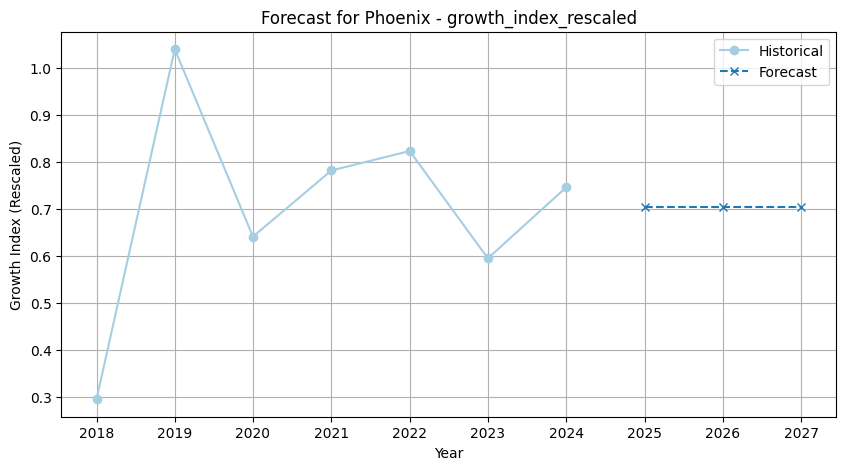


🔍 Processing: Market = Salt Lake City


C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start


                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  -8.397
Date:                   Sat, 12 Apr 2025   AIC                             20.793
Time:                           23:10:31   BIC                             20.685
Sample:                       01-01-2018   HQIC                            19.456
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1388      0.435      0.319      0.749      -0.713       0.991
sigma2         0.6448      0.819      0.787      0.431      -0.960       2.249
Ljung-Box (L1) (Q):         

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


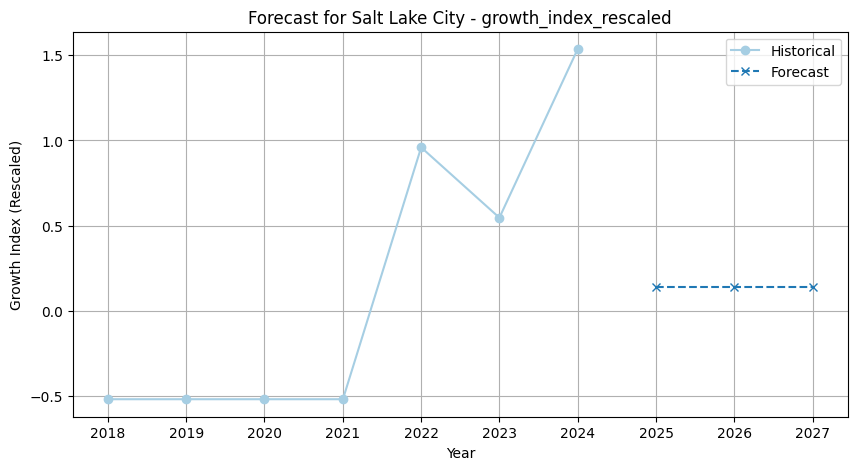


🔍 Processing: Market = San Diego
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   3.759
Date:                   Sat, 12 Apr 2025   AIC                             -3.518
Time:                           23:10:31   BIC                             -3.626
Sample:                       01-01-2018   HQIC                            -4.855
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0423      0.054     -0.788      0.431      -0.148       0.063
sigma2         0.0200      0.016      1.290      0.197      -0.010       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


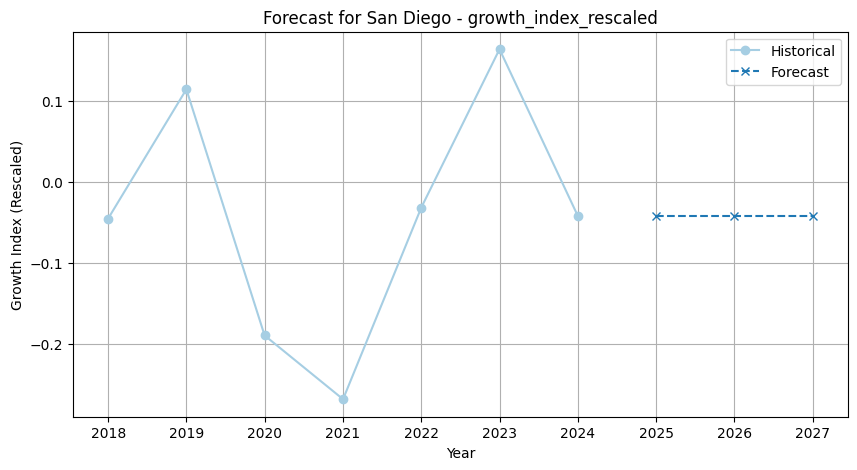


🔍 Processing: Market = San Francisco
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   6.471
Date:                   Sat, 12 Apr 2025   AIC                             -8.941
Time:                           23:10:31   BIC                             -9.049
Sample:                       01-01-2018   HQIC                           -10.278
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5583      0.037     15.244      0.000       0.486       0.630
sigma2         0.0092      0.005      1.744      0.081      -0.001   

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


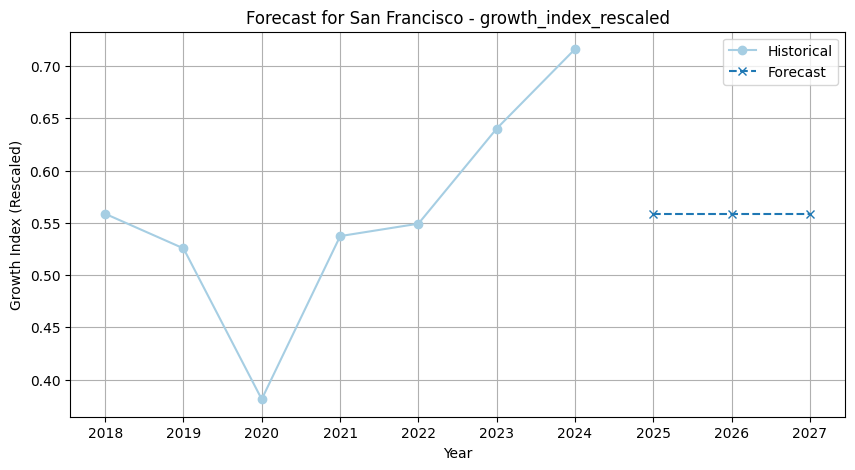


🔍 Processing: Market = Seattle


C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  -0.041
Date:                   Sat, 12 Apr 2025   AIC                              4.082
Time:                           23:10:31   BIC                              3.974
Sample:                       01-01-2018   HQIC                             2.745
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7159      0.124      5.751      0.000       0.472       0.960
sigma2         0.0592      0.062      0.953      0.341      -0.063       0.181
Ljung-Box (L1) (Q):         

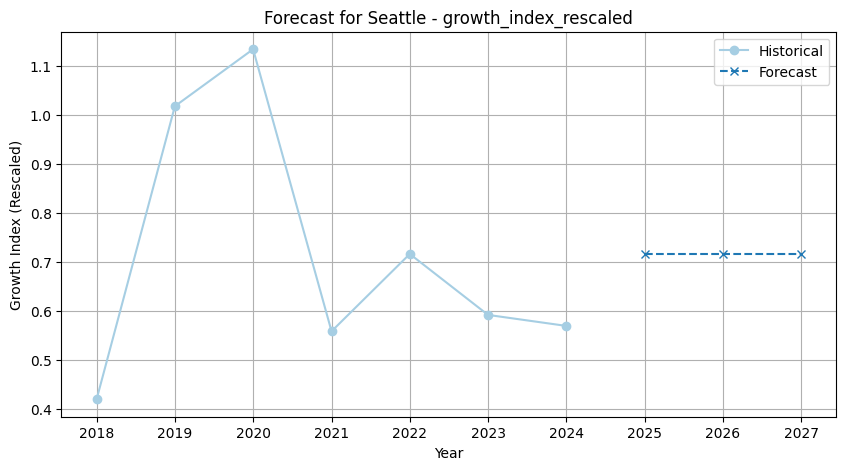


🔍 Processing: Market = South Florida
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.602
Date:                   Sat, 12 Apr 2025   AIC                            -11.204
Time:                           23:10:32   BIC                            -11.312
Sample:                       01-01-2018   HQIC                           -12.541
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5673      0.032     17.737      0.000       0.505       0.630
sigma2         0.0067      0.004      1.601      0.109      -0.001   

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


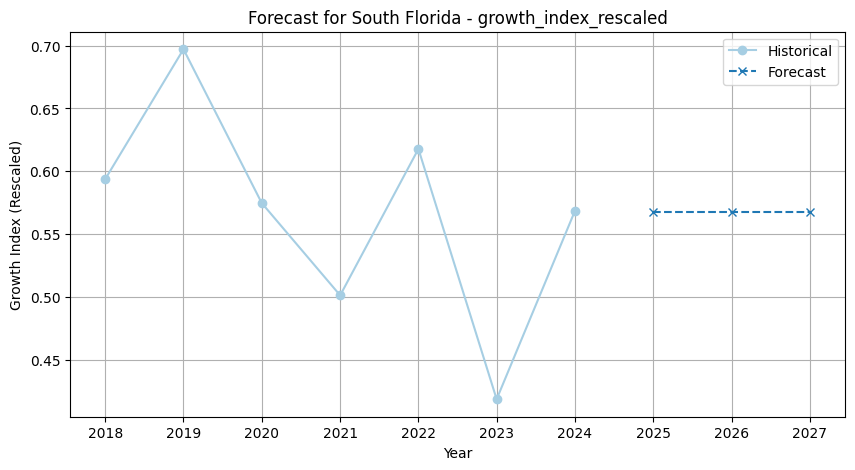


🔍 Processing: Market = Tampa
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   7.695
Date:                   Sat, 12 Apr 2025   AIC                            -11.389
Time:                           23:10:32   BIC                            -11.497
Sample:                       01-01-2018   HQIC                           -12.726
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0501      0.030      1.643      0.100      -0.010       0.110
sigma2         0.0065      0.007      0.914      0.361      -0.007       0.02

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\807405141.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),


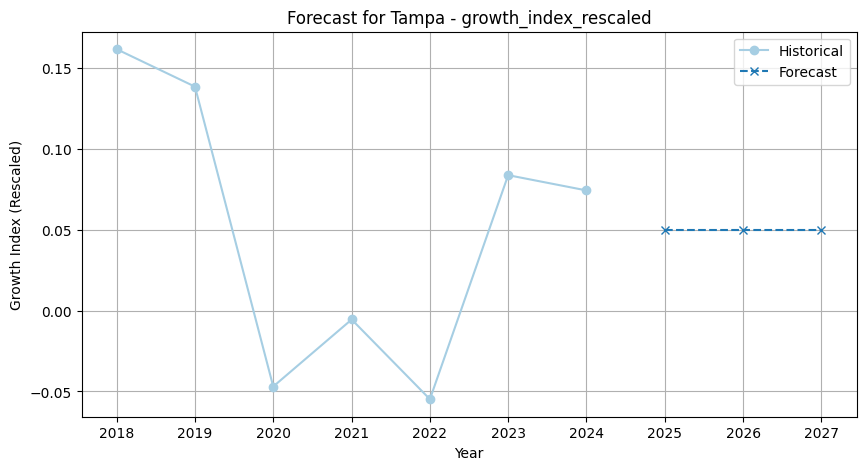


📈 Forecast Preview:
        date  forecast   market
0 2025-01-01  0.686973  Atlanta
1 2026-01-01  0.686973  Atlanta
2 2027-01-01  0.686973  Atlanta
3 2025-01-01  0.711448   Austin
4 2026-01-01  0.711448   Austin


In [221]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Replace this with your actual DataFrame
df = df_legal.copy()
forecast_data = []
forecast_years = 3

# Ensure year is an integer
df['year'] = df['year'].astype(int)

# Loop through each market
for market, group_df in df.groupby('market'):
    print(f"\n🔍 Processing: Market = {market}")
    
    # Aggregate to one value per year if necessary (mean is a safe default)
    ts = group_df.groupby('year')['growth_index_rescaled'].mean()

    # Build complete annual index from min to max year
    all_years = pd.RangeIndex(start=ts.index.min(), stop=ts.index.max() + 1)
    ts = ts.reindex(all_years)

    # Impute missing values
    ts = ts.ffill().bfill()

    # Convert to time series with datetime index
    ts.index = pd.to_datetime(ts.index.astype(str), format='%Y')
    ts = ts.asfreq('AS')  # Annual Start

    try:
        # Fit ARIMA model (non-seasonal)
        model = ARIMA(ts, order=(0, 0, 0))
        model_fit = model.fit()

        # Summary for diagnostics
        print(model_fit.summary())

        # Forecast next n years
        forecast = model_fit.forecast(steps=forecast_years)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
                                     periods=forecast_years, freq='AS')

        # Store forecast
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market
        })

        forecast_data.append(forecast_df)

        # Optional: Plot
        plt.figure(figsize=(10, 5))
        plt.plot(ts.index, ts, label='Historical', marker='o')
        plt.plot(future_dates, forecast, label='Forecast', marker='x', linestyle='--')
        plt.title(f"Forecast for {market} - growth_index_rescaled")
        plt.xlabel('Year')
        plt.ylabel('Growth Index (Rescaled)')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}: {e}. Skipping.")

# Combine all forecasts
if forecast_data:
    forecast_results_df = pd.concat(forecast_data, ignore_index=True)
    forecast_results_df.to_csv('legal_annual_growth_index_forecast.csv', index=False)
    print("\n📈 Forecast Preview:")
    print(forecast_results_df.head())
else:
    print("❌ No forecasts generated.")


##### finance

In [222]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Replace this with your actual DataFrame
df = df_finance.copy()
forecast_data = []
forecast_years = 3

# Ensure year is an integer
df['year'] = df['year'].astype(int)

# Loop through each market
for market, group_df in df.groupby('market'):
    print(f"\n🔍 Processing: Market = {market}")
    
    # Aggregate to one value per year if necessary (mean is a safe default)
    ts = group_df.groupby('year')['growth_index_rescaled'].mean()

    # Build complete annual index from min to max year
    all_years = pd.RangeIndex(start=ts.index.min(), stop=ts.index.max() + 1)
    ts = ts.reindex(all_years)

    # Impute missing values
    ts = ts.ffill().bfill()

    # Convert to time series with datetime index
    ts.index = pd.to_datetime(ts.index.astype(str), format='%Y')
    ts = ts.asfreq('AS')  # Annual Start

    try:
        # Fit ARIMA model (non-seasonal)
        model = ARIMA(ts, order=(0, 0, 0))
        model_fit = model.fit()

        # Summary for diagnostics
        print(model_fit.summary())

        # Forecast next n years
        forecast = model_fit.forecast(steps=forecast_years)
        future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
                                     periods=forecast_years, freq='AS')

        # Store forecast
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast,
            'market': market
        })

        forecast_data.append(forecast_df)

        # Optional: Plot
        # plt.figure(figsize=(10, 5))
        # plt.plot(ts.index, ts, label='Historical', marker='o')
        # plt.plot(future_dates, forecast, label='Forecast', marker='x', linestyle='--')
        # plt.title(f"Forecast for {market} - growth_index_rescaled")
        # plt.xlabel('Year')
        # plt.ylabel('Growth Index (Rescaled)')
        # plt.legend()
        # plt.grid(True)
        # plt.show()

    except Exception as e:
        print(f"❌ Error with ARIMA for {market}: {e}. Skipping.")

# Combine all forecasts
if forecast_data:
    forecast_results_df = pd.concat(forecast_data, ignore_index=True)
    forecast_results_df.to_csv('finance_annual_growth_index_forecast.csv', index=False)
    print("\n📈 Forecast Preview:")
    print(forecast_results_df.head())
else:
    print("❌ No forecasts generated.")



🔍 Processing: Market = Atlanta
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  10.169
Date:                   Sat, 12 Apr 2025   AIC                            -16.338
Time:                           23:11:05   BIC                            -16.446
Sample:                       01-01-2018   HQIC                           -17.675
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6661      0.029     23.086      0.000       0.610       0.723
sigma2         0.0032      0.002      1.452      0.147      -0.001       0.

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is depreca


🔍 Processing: Market = Manhattan
                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                  22.039
Date:                   Sat, 12 Apr 2025   AIC                            -40.078
Time:                           23:11:05   BIC                            -40.186
Sample:                       01-01-2018   HQIC                           -41.415
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3251      0.004     77.213      0.000       0.317       0.333
sigma2         0.0001   9.98e-05      1.079      0.280   -8.79e-05       

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is depreca

                                 SARIMAX Results                                 
Dep. Variable:     growth_index_rescaled   No. Observations:                    7
Model:                             ARIMA   Log Likelihood                   9.635
Date:                   Sat, 12 Apr 2025   AIC                            -15.270
Time:                           23:11:05   BIC                            -15.378
Sample:                       01-01-2018   HQIC                           -16.607
                            - 01-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1600      0.023      6.849      0.000       0.114       0.206
sigma2         0.0037      0.003      1.214      0.225      -0.002       0.010
Ljung-Box (L1) (Q):         

C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:29: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  ts = ts.asfreq('AS')  # Annual Start
c:\Users\nia_4\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\3473484297.py:41: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.YearBegin(),
C:\Users\nia_4\AppData\Local\Temp\ipykernel_21784\

## lowkey don't remember what the following were for but i refuse to delete code

In [ ]:
df[['quarter_percent_change_lease', 'go_stay']]

In [8]:
df.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing,quarter_percent_change_lease
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,NaN
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.000000
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,0.000000
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0,-40.608534
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0,68.374358


In [ ]:
print("lease: ", leases['market'].value_counts())
print("mmod: ", mmod['market'].value_counts())

In [3]:
print("Leases: ", leases.shape, "\n", leases.head(3), "\n")
print("Major Market Occupancy: ", mmod.shape, "\n", mmod.head(3))

   year quarter  monthsigned   market            building_name  \
0  2018      Q1          1.0  Atlanta  10 Glenlake North Tower   
1  2018      Q1          1.0  Atlanta            100 City View   
2  2018      Q1          1.0  Atlanta            1000 Parkwood   

                                         building_id               address  \
0  Atlanta_Central Perimeter_Atlanta_10 Glenlake ...    10 Glenlake Pky NE   
1  Atlanta_Northwest_Atlanta_100 City View_3330 C...  3330 Cumberland Blvd   
2  Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...  1000 Parkwood Cir SE   

  region     city state  ...  overall_rent direct_available_space  \
0  South  Atlanta    GA  ...     24.345689                    NaN   
1  South  Atlanta    GA  ...     24.345689                    NaN   
2  South  Atlanta    GA  ...     24.345689                    NaN   

  direct_availability_proportion  direct_internal_class_rent  \
0                            NaN                         NaN   
1                